In [365]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy import stats

In [366]:
import os
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: C:\Users\Jody\Thinkful Data Science Projects


In [367]:
df = pd.read_csv('clinvar_conflicting.csv', low_memory=False)

In [368]:
# Load CSV file from Jupyter Hub

df = pd.read_csv('clinvar_conflicting.csv', encoding='ISO-8859-1', low_memory=False)

In [369]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [371]:
df.shape

(65188, 46)

The info above indicates that the DataFrame has a total of 46 parameters (fields). Typically, it's best practice to examine the variables and begin cleaning the data. Without cleaning the data, feature selection and model generation will be highly inaccurate.

Let's begin exploring our dataframe and focus on our first goal - data cleaning. Data cleaning typically involves examining null values, detecting outliers, and examining initial relationships between categorical and continuous variables. 

In [372]:
# create new dataframe with data type, nulls, & unique values

var_df = pd.DataFrame(columns=['variable_name', 'data_type', 'missing_percentage', 'flag', 'unique_values_count'])

missing_percentages = df.isnull().mean() * 100
missing_percentages = missing_percentages.sort_values(ascending=False)

# create variables and flag as numeric or categorial
for col in df.columns:
    data_type = df[col].dtype
    missing_percentage = missing_percentages[col]
    unique_values_count = df[col].nunique()
    if data_type == 'int64' or data_type == 'float64':
        flag = 'numeric'
    else:
        flag = 'categorical'
    
    # concat values obtained into a new dataframe called 'var_df'
    var_df = pd.concat([var_df, pd.DataFrame({'variable_name': [col], 'data_type': [data_type], 'missing_percentage': [missing_percentage], 'flag': [flag], 'unique_values_count': [unique_values_count]})], ignore_index=True)
    
var_df.info()
print(var_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   variable_name        46 non-null     object 
 1   data_type            46 non-null     object 
 2   missing_percentage   46 non-null     float64
 3   flag                 46 non-null     object 
 4   unique_values_count  46 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.9+ KB
         variable_name data_type  missing_percentage         flag  \
0                CHROM    object            0.000000  categorical   
1                  POS     int64            0.000000      numeric   
2                  REF    object            0.000000  categorical   
3                  ALT    object            0.000000  categorical   
4               AF_ESP   float64            0.000000      numeric   
5              AF_EXAC   float64            0.000000      numeric   
6            

In [373]:
# sort variables by missing percentage value
var_df_sorted = var_df.sort_values(by='missing_percentage')
var_df_sorted.reset_index(drop=True, inplace=True)

var_df_sorted

,variable_name,data_type,missing_percentage,flag,unique_values_count
0,CHROM,object,0.000000,categorical,24
1,Consequence,object,0.000000,categorical,48
2,ORIGIN,int64,0.000000,numeric,31
3,IMPACT,object,0.000000,categorical,4
4,CLNVC,object,0.000000,categorical,7
5,CLNHGVS,object,0.000000,categorical,65188
6,CLASS,int64,0.000000,numeric,2
7,CLNDN,object,0.000000,categorical,9260
8,AF_TGP,float64,0.000000,numeric,2087
9,AF_EXAC,float64,0.000000,numeric,6667


The chart above shows the presence of columns with very high values of missing percentages. In fact, 9 of them have greater than 99.5% missing values, meaning less than 0.5% are actual non-null values in such columns.

For the sake of this project, columns with > 99% missing values will be dropped. This will effectively drop the 9 columns at the bottom of the chart.

In [374]:
var_df = var_df_sorted.copy()

# Set the threshold for missing values percentage and drop if necessary
threshold = 99  
var_df = var_df[var_df['missing_percentage'] <= threshold]

var_df

,variable_name,data_type,missing_percentage,flag,unique_values_count
0,CHROM,object,0.000000,categorical,24
1,Consequence,object,0.000000,categorical,48
2,ORIGIN,int64,0.000000,numeric,31
3,IMPACT,object,0.000000,categorical,4
4,CLNVC,object,0.000000,categorical,7
5,CLNHGVS,object,0.000000,categorical,65188
6,CLASS,int64,0.000000,numeric,2
7,CLNDN,object,0.000000,categorical,9260
8,AF_TGP,float64,0.000000,numeric,2087
9,AF_EXAC,float64,0.000000,numeric,6667


Now that columns have been removed, they must be removed again from the original 'df' dataframe. The chart above is a dataframe extracted from the initial dataframe for analysis. Calling 'df' dataframe below proves this point. 

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [376]:
# Set the threshold for missing values percentage and drop

threshold = 99  

missing_percentages = df.isnull().mean() * 100
columns_to_drop = missing_percentages[missing_percentages > threshold].index.tolist() 

df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   CLNDISDB          65188 non-null  object 
 8   CLNDN             65188 non-null  object 
 9   CLNHGVS           65188 non-null  object 
 10  CLNVC             65188 non-null  object 
 11  CLNVI             27659 non-null  object 
 12  MC                64342 non-null  object 
 13  ORIGIN            65188 non-null  int64  
 14  CLASS             65188 non-null  int64  
 15  Allele            65188 non-null  object 
 16  Consequence       65188 non-null  object

Now that our first set of columns have been dropped, we can begin examining the relationships between variables to better understand inconsistencies and errors in the data. A heat matrix will give us a good initial indication of correlations between variables.

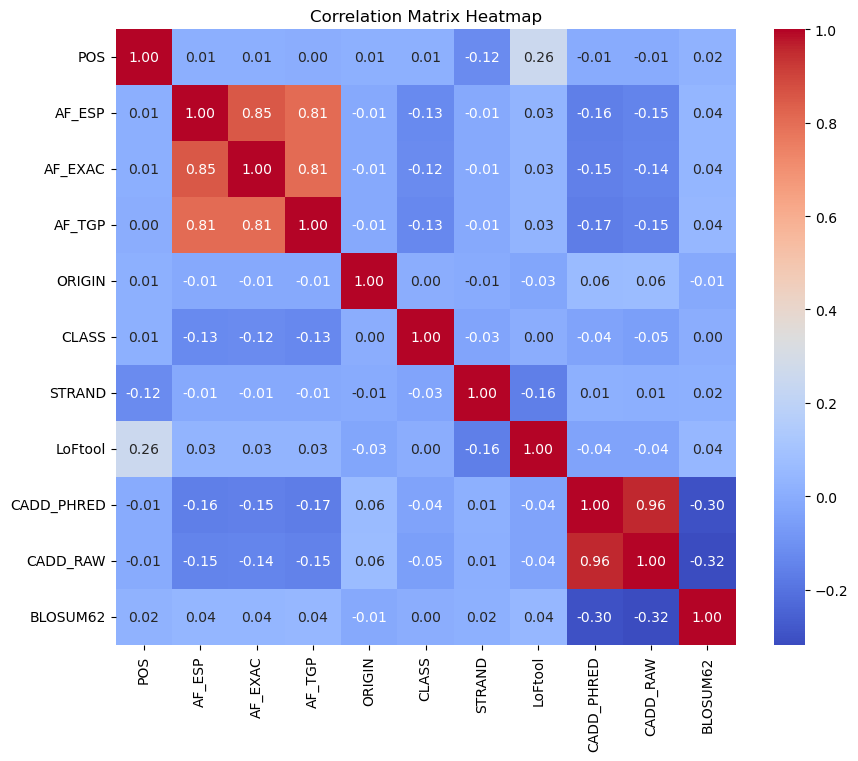

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter numerical columns and create correlation heat matrix map
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_columns.corr() # calculate correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f') # generate heat map
plt.title('Correlation Matrix Heatmap')
plt.show()

In [378]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   POS         65188 non-null  int64  
 1   AF_ESP      65188 non-null  float64
 2   AF_EXAC     65188 non-null  float64
 3   AF_TGP      65188 non-null  float64
 4   ORIGIN      65188 non-null  int64  
 5   CLASS       65188 non-null  int64  
 6   STRAND      65174 non-null  float64
 7   LoFtool     60975 non-null  float64
 8   CADD_PHRED  64096 non-null  float64
 9   CADD_RAW    64096 non-null  float64
 10  BLOSUM62    25593 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 5.5 MB


The heat matrix above shows the correlations between the numerical columns of the initial 'df' dataframe which are separated into another dataframe called 'numerical_columns'. Keep in mind that these may not end up being the final numerical columns in the dataframe. All columns must be analyzed first to accurately assign numeric and non-numeric values to each. As for now, the collected numerical columns above will serve as a good first step.

OBSERVATION:

There appears to be high correlations amongst the three Allele Frequency columns - AF_ESP, AF_EXAC, AF_TGP. These columns have the same theoretical value of allele frequency but are obtained from different databases. Allele frequency refers to the proportion of a specific allele within a population's gene pool, representing the prevalence of that genetic variant. Mutations can affect allele frequencies by introducing new alleles or altering the relative proportions of existing alleles in a population over time.

The high correlations help prove this point. However, they also show that there is a discrepancy between the values of the three different databases. Further analysis could explore the potential significance of differences between databases and the biases within each.

I've decided to clean these 3 variables first as they appear to have high correlations.

In [379]:
# create dataframe of absolute correlations between features excluding autocorrelation combinations
corr_pairs = corr_matrix.stack().abs().reset_index()
corr_pairs.columns = ['variable_1', 'variable_2', 'abs_correlation']
corr_pairs = corr_pairs[corr_pairs['variable_1'] != corr_pairs['variable_2']]
corr_pairs = corr_pairs.sort_values(by='abs_correlation', ascending=False)

# display the new dataframe
print(corr_pairs.head)

<bound method NDFrame.head of      variable_1  variable_2  abs_correlation
97   CADD_PHRED    CADD_RAW         0.955003
107    CADD_RAW  CADD_PHRED         0.955003
23      AF_EXAC      AF_ESP         0.851870
13       AF_ESP     AF_EXAC         0.851870
34       AF_TGP      AF_ESP         0.807741
..          ...         ...              ...
3           POS      AF_TGP         0.004225
65        CLASS    BLOSUM62         0.001593
115    BLOSUM62       CLASS         0.001593
82      LoFtool       CLASS         0.000045
62        CLASS     LoFtool         0.000045

[110 rows x 3 columns]>


The output above displays all correlations in descending order. This means that the variables at the top of the chart have higher correlations than those at the bottom of the chart. We also see that the three allele columns we were talking about earlier appear near the top. 

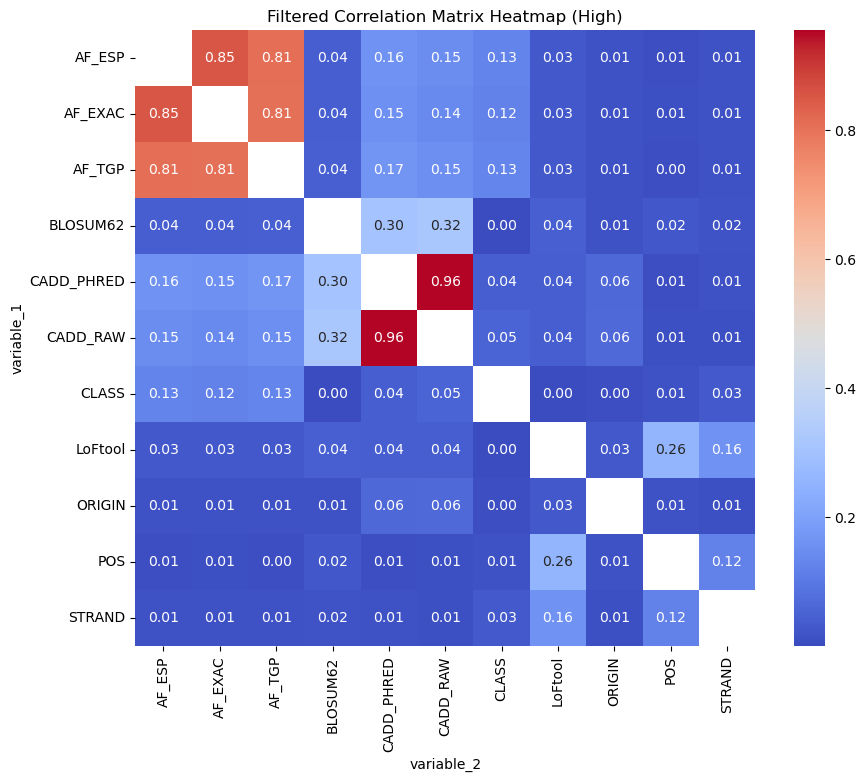

In [380]:
# create a new correlation matrix from the filtered pairs
corr_matrix_filtered = pd.pivot_table(corr_pairs, values='abs_correlation', index='variable_1', columns='variable_2')

# create a heatmap of the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_filtered, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Filtered Correlation Matrix Heatmap (High)')
plt.show()

The reason correlations were calculated is because variables with high correlations often produce: 

1. Redundant features
2. Multicollinearity
3. Decreased model performance

Generally, high correlations are a warning sign. If distributions prove to be similar statistically, only using one of the 2 variables in a pair of high correlation would be beneficial. Let's visualize our distributions.

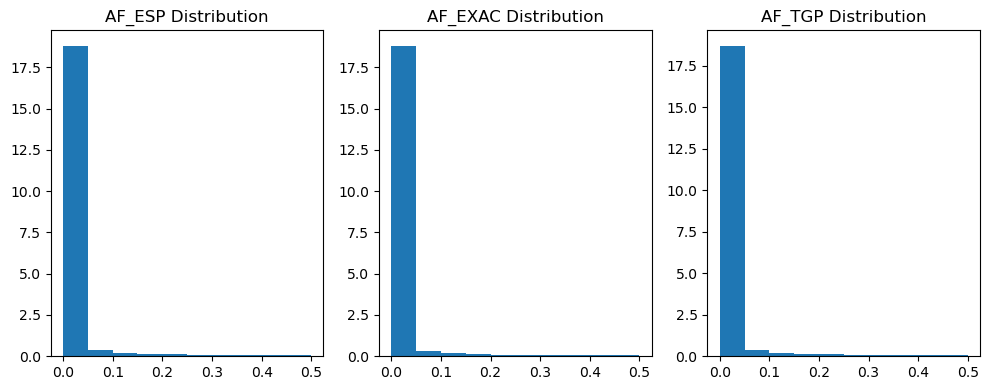

In [381]:
import matplotlib.pyplot as plt

# Create three subplots for the histograms

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 4))

# Plot histograms for each column

ax1.hist(df['AF_ESP'], bins=10, density=True)
ax1.set_title('AF_ESP Distribution')


ax2.hist(df['AF_EXAC'], bins=10, density=True)
ax2.set_title('AF_EXAC Distribution')


ax3.hist(df['AF_TGP'], bins=10, density=True)
ax3.set_title('AF_TGP Distribution')

plt.tight_layout()

plt.show()

The distributions of Allele frequency above appear to look similar. Combining that with the 0% missing values and high correlation for all three enhance the argument that the columns are not significiantly different.

However...

One key piece of information has yet to be dealt with. The columns look the same and have 0% missing values, but with regards to the original database, missing values in these columns are labeled as "0". Thus, python will count these values as non-null instead of null when iterating through the column. 

Let's further explore the actual missing values in the columns that are labeled as "0".

In [382]:
allele_df = df[['AF_ESP', 'AF_EXAC', 'AF_TGP']]

allele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AF_ESP   65188 non-null  float64
 1   AF_EXAC  65188 non-null  float64
 2   AF_TGP   65188 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [383]:
# initiate count of three new variables

esp_zeros = 0
exac_zeros = 0
tgp_zeros = 0

# iterate through allele_df and print count of zeroes 

for column in allele_df.columns:
    column_values = allele_df[column].values
    zeros_count = len(column_values[column_values == 0])
    
    if column == 'AF_ESP':
        esp_zeros += zeros_count
    elif column == 'AF_EXAC':
        exac_zeros += zeros_count
    elif column == 'AF_TGP':
        tgp_zeros += zeros_count

print("Count of zeroes (missing values) in AF_ESP column:", esp_zeros)
print("Count of zeroes (missing values) in AF_EXAC column:", exac_zeros)
print("Count of zeroes (missing values) in AF_TGP column:", tgp_zeros)

Count of zeroes (missing values) in AF_ESP column: 35781
Count of zeroes (missing values) in AF_EXAC column: 24047
Count of zeroes (missing values) in AF_TGP column: 37972


In [384]:
esp_missing = round((esp_zeros / len(allele_df)) * 100, 2)
exac_missing = round((exac_zeros / len(allele_df)) * 100, 2)
tgp_missing = round((tgp_zeros / len(allele_df)) * 100, 2)

print("Percentage of actual missing values in AF_ESP column:", esp_missing)
print("Percentage of actual missing values in AF_EXAC column:", exac_missing)
print("Percentage of actual missing values in AF_TGP column:", tgp_missing)

Percentage of actual missing values in AF_ESP column: 54.89
Percentage of actual missing values in AF_EXAC column: 36.89
Percentage of actual missing values in AF_TGP column: 58.25


All three columns appear to have different counts of zero. Thus, they have different counts of actual null values. 

ESP and TGP have similar missing percentages at 54.89 and 58.25, respectively. EXAC, however, has only 36.89 % missing. This seems to be much less, so it's possible the EXAC column is more comprehensive with respect to allele frequency data collection. As a scientist though, it's important to remember that just because something appears to be different doesn't mean it's significant. Hence, association is not synonymous with causation. 

The next step is to visualize the distributions after removing null-values.

In [385]:
allele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AF_ESP   65188 non-null  float64
 1   AF_EXAC  65188 non-null  float64
 2   AF_TGP   65188 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [386]:
for column in allele_df.columns:
    allele_df.loc[allele_df[column] == 0, column] = None

allele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AF_ESP   29407 non-null  float64
 1   AF_EXAC  41141 non-null  float64
 2   AF_TGP   27216 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


The 'allele_df' dataframe above now has the correct count of non-null values in each column.

Column: AF_ESP
Count: 29407


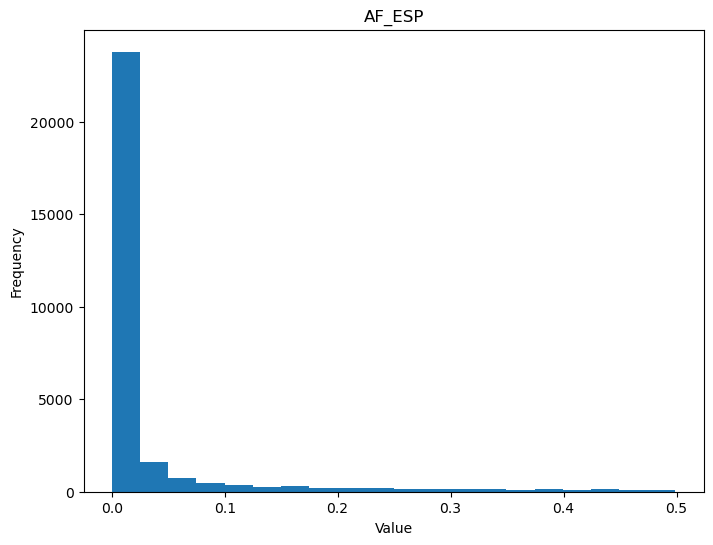

Column: AF_EXAC
Count: 41141


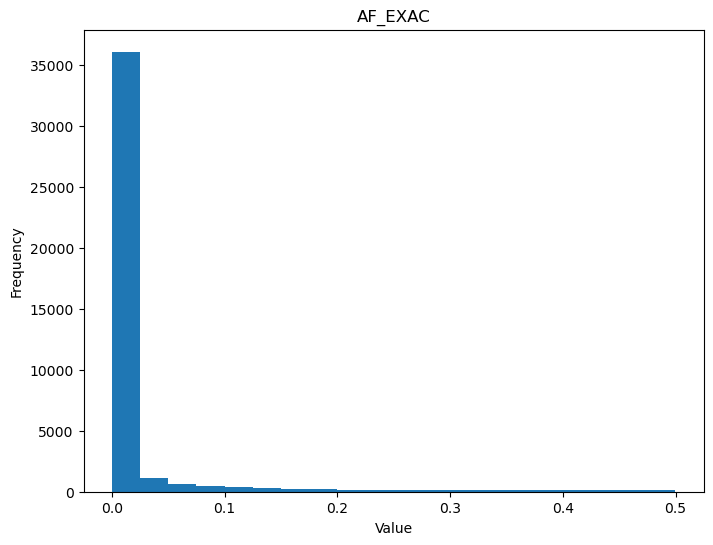

Column: AF_TGP
Count: 27216


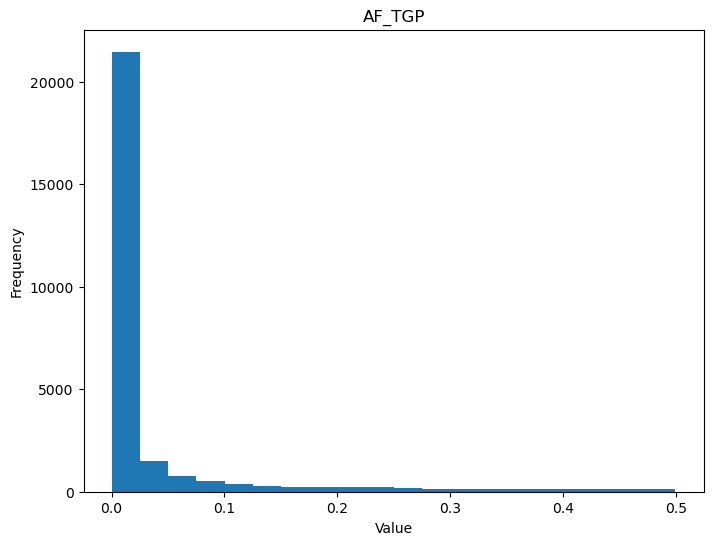

In [387]:
# Plot the distributions and print the count of column values
for column in allele_df.columns:
    column_values = allele_df[column].dropna()

    # Plot the distribution
    plt.figure(figsize=(8, 6))
    plt.hist(column_values, bins=20)
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    # Print the count of column values
    print("Column:", column)
    print("Count:", len(column_values))

    plt.show()

The distributions of the allele frequency columns are displayed above. Similar to the distributions before dropping nulls, the distribution after dropping nulls show heavy right skew for all three distributions. The next step in EDA is to utilize different techniques to fill the new filtered dataframe null values.

In [388]:
# Create a copy of the original DataFrame
allele_df_filled = allele_df.copy()

# Fill null values using different methods
allele_df_filled['AF_ESP_mean'] = allele_df['AF_ESP'].fillna(allele_df['AF_ESP'].mean())
allele_df_filled['AF_ESP_median'] = allele_df['AF_ESP'].fillna(allele_df['AF_ESP'].median())
allele_df_filled['AF_ESP_interpolate'] = allele_df['AF_ESP'].interpolate()

# Perform Anderson-Darling test for each filled column
columns_to_test = ['AF_ESP_mean', 'AF_ESP_median', 'AF_ESP_interpolate']

for column in columns_to_test:
    result = stats.anderson(allele_df_filled[column].dropna())
    print("Anderson-Darling test for", column)
    print("Statistic: %.3f" % result.statistic)
    print("Critical Values: ", result.critical_values)
    print("Significance Levels: ", result.significance_level)
    print("\n")

Anderson-Darling test for AF_ESP_mean
Statistic: 12135.450
Critical Values:  [0.576 0.656 0.787 0.918 1.092]
Significance Levels:  [15.  10.   5.   2.5  1. ]


Anderson-Darling test for AF_ESP_median
Statistic: 19084.195
Critical Values:  [0.576 0.656 0.787 0.918 1.092]
Significance Levels:  [15.  10.   5.   2.5  1. ]


Anderson-Darling test for AF_ESP_interpolate
Statistic: 15114.652
Critical Values:  [0.576 0.656 0.787 0.918 1.092]
Significance Levels:  [15.  10.   5.   2.5  1. ]




In [389]:
# Calculate skewness for each filled column
skewness = {
    'AF_ESP_mean': allele_df_filled['AF_ESP_mean'].skew(),
    'AF_ESP_median': allele_df_filled['AF_ESP_median'].skew(),
    'AF_ESP_interpolate': allele_df_filled['AF_ESP_interpolate'].skew()
}

# Print the skewness for each filled column
for column, skew in skewness.items():
    print("Skewness for", column, ":", skew)

Skewness for AF_ESP_mean : 5.202083531653598
Skewness for AF_ESP_median : 5.487123893538402
Skewness for AF_ESP_interpolate : 4.116733631642641


In [390]:
# Calculate kurtosis for each filled column
kurtosis = {
    'AF_ESP_mean': allele_df_filled['AF_ESP_mean'].kurtosis(),
    'AF_ESP_median': allele_df_filled['AF_ESP_median'].kurtosis(),
    'AF_ESP_interpolate': allele_df_filled['AF_ESP_interpolate'].kurtosis()
}

# Print the kurtosis for each filled column
for column, kurt in kurtosis.items():
    print("Kurtosis for", column, ":", kurt)

Kurtosis for AF_ESP_mean : 30.898065936734476
Kurtosis for AF_ESP_median : 32.28469314923911
Kurtosis for AF_ESP_interpolate : 18.511210450472174


Three methods were used to fill in null values:

1. Mean
2. Median
3. Interpolation = winner!

Of the three, interpolation produced the smallest skew and kurtosis. This could indicate that the data is a bit more normally distributed after undergoing interpolation than filling with mean or median.

Thus, we will continue with using interpolation for these columns for the remainder of our cleaning process.

In [391]:
# Create a copy of the original DataFrame
allele_final = allele_df.copy()

# Fill null values using interpolation
allele_final['ESP_interpolate'] = allele_df['AF_ESP'].interpolate()
allele_final['EXAC_interpolate'] = allele_df['AF_EXAC'].interpolate()
allele_final['TGP_interpolate'] = allele_df['AF_TGP'].interpolate()

allele_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AF_ESP            29407 non-null  float64
 1   AF_EXAC           41141 non-null  float64
 2   AF_TGP            27216 non-null  float64
 3   ESP_interpolate   65188 non-null  float64
 4   EXAC_interpolate  65188 non-null  float64
 5   TGP_interpolate   65188 non-null  float64
dtypes: float64(6)
memory usage: 3.0 MB


In [392]:
allele_final.drop(['AF_ESP', 'AF_EXAC', 'AF_TGP'], axis=1, inplace=True)

In [393]:
allele_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ESP_interpolate   65188 non-null  float64
 1   EXAC_interpolate  65188 non-null  float64
 2   TGP_interpolate   65188 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


The null values in each column have successfully been interpolated. After doing this, we need to assess the effects of different transformations in order to increase normality of the distributions.

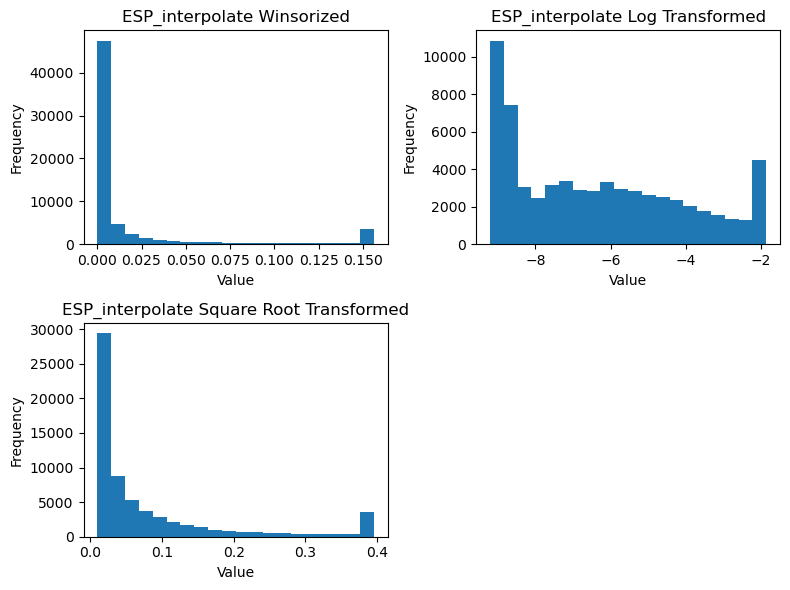

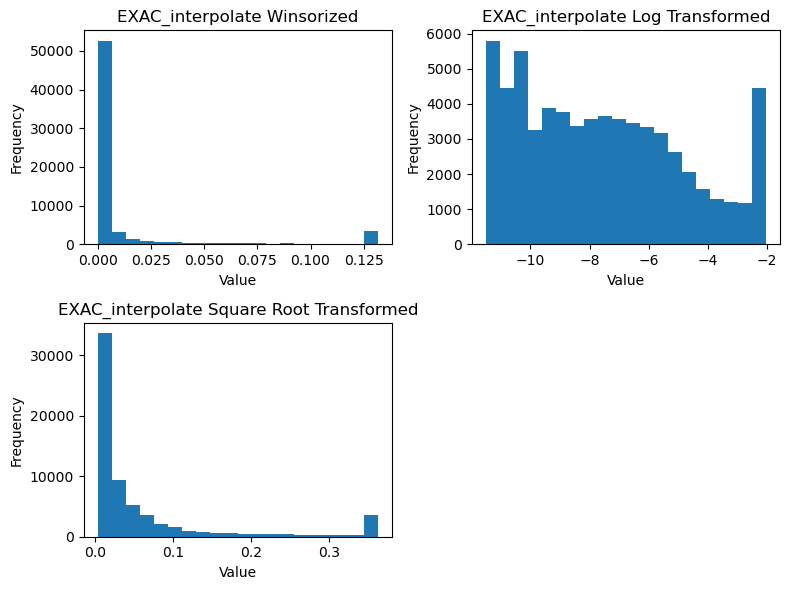

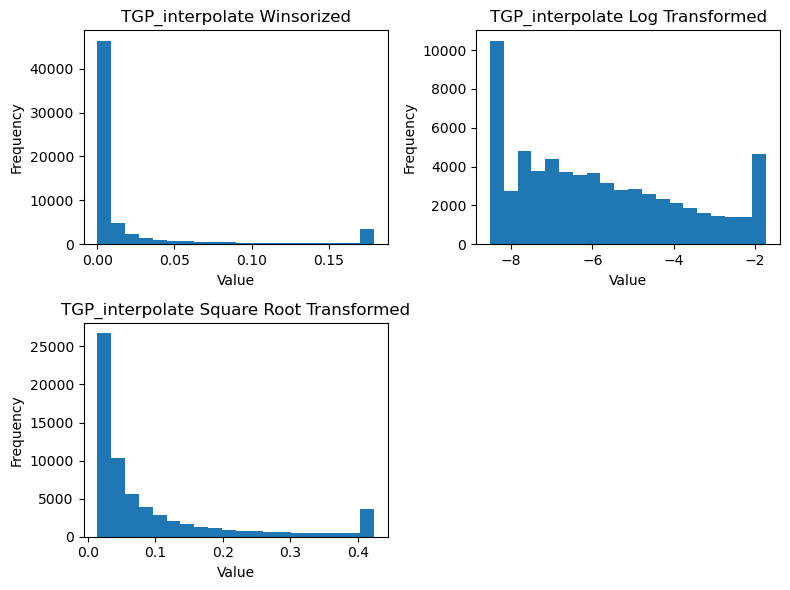

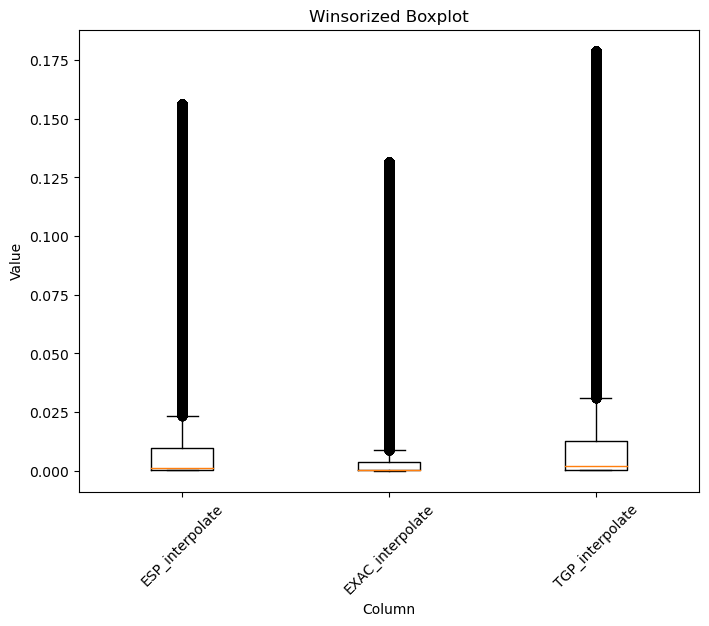

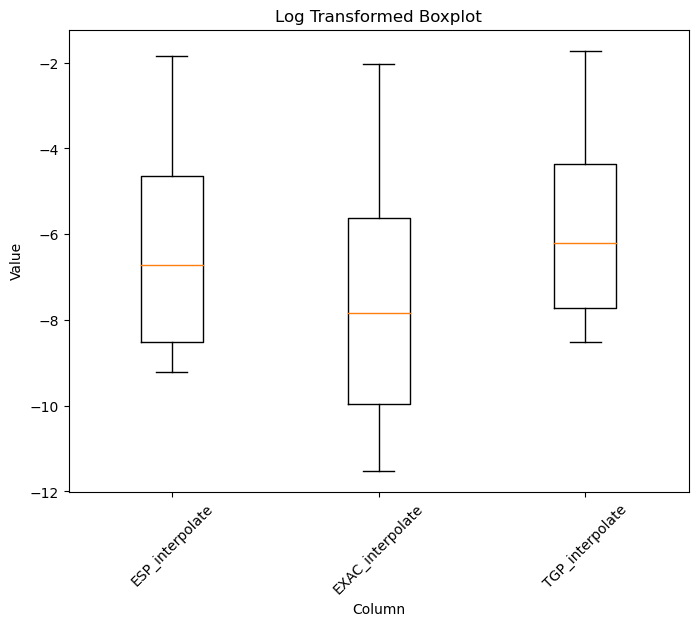

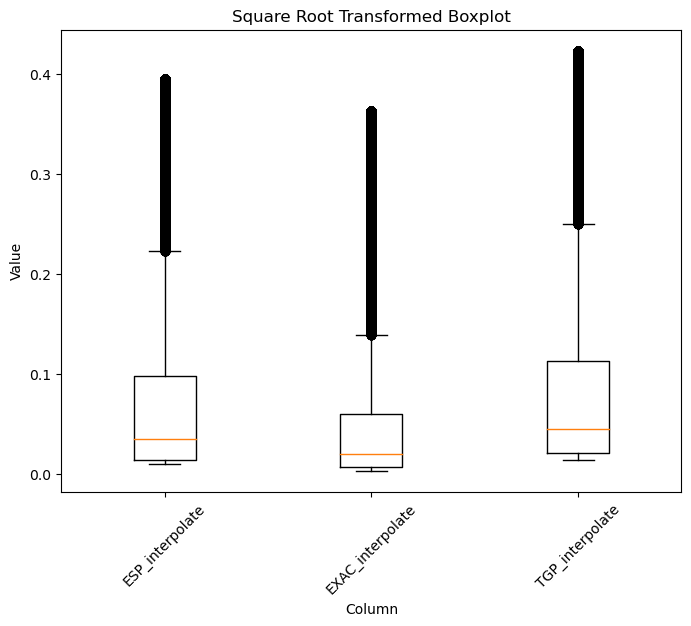

In [394]:
from scipy.stats.mstats import winsorize

winsorized_df = allele_final.apply(winsorize, limits=[0.05, 0.05])

# Log transformation
log_transformed_df = np.log(winsorized_df)

# Square root transformation
sqrt_transformed_df = np.sqrt(winsorized_df)

# Compare distributions with histograms
for column in winsorized_df.columns:
    plt.figure(figsize=(8, 6))

    # Original winsorized data
    plt.subplot(2, 2, 1)
    plt.hist(winsorized_df[column], bins=20)
    plt.title(column + " Winsorized")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    # Log transformed data
    plt.subplot(2, 2, 2)
    plt.hist(log_transformed_df[column], bins=20)
    plt.title(column + " Log Transformed")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    # Square root transformed data
    plt.subplot(2, 2, 3)
    plt.hist(sqrt_transformed_df[column], bins=20)
    plt.title(column + " Square Root Transformed")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Compare distributions with boxplots
transformed_dfs = [winsorized_df, log_transformed_df, sqrt_transformed_df]
transformation_labels = ['Winsorized', 'Log Transformed', 'Square Root Transformed']

for i, transformed_df in enumerate(transformed_dfs):
    plt.figure(figsize=(8, 6))
    plt.boxplot(transformed_df.values)
    plt.xticks(np.arange(1, len(winsorized_df.columns) + 1), winsorized_df.columns, rotation=45)
    plt.title(transformation_labels[i] + " Boxplot")
    plt.xlabel("Column")
    plt.ylabel("Value")
    plt.show()

The histograms and boxplots above visually show that log transformation is the most successful technique for all three allele columns. Thus, we will continue with log transformation.

In [395]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on each log-transformed column
for column in log_transformed_df.columns:
    _, p_value = shapiro(log_transformed_df[column])
    print("Shapiro-Wilk test for", column)
    print("p-value:", p_value)
    if p_value > 0.05:
        print("The data is likely normally distributed.\n")
    else:
        print("The data is likely not normally distributed.\n")

Shapiro-Wilk test for ESP_interpolate
p-value: 0.0
The data is likely not normally distributed.

Shapiro-Wilk test for EXAC_interpolate
p-value: 0.0
The data is likely not normally distributed.

Shapiro-Wilk test for TGP_interpolate
p-value: 0.0
The data is likely not normally distributed.



C:\Users\Jody\anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


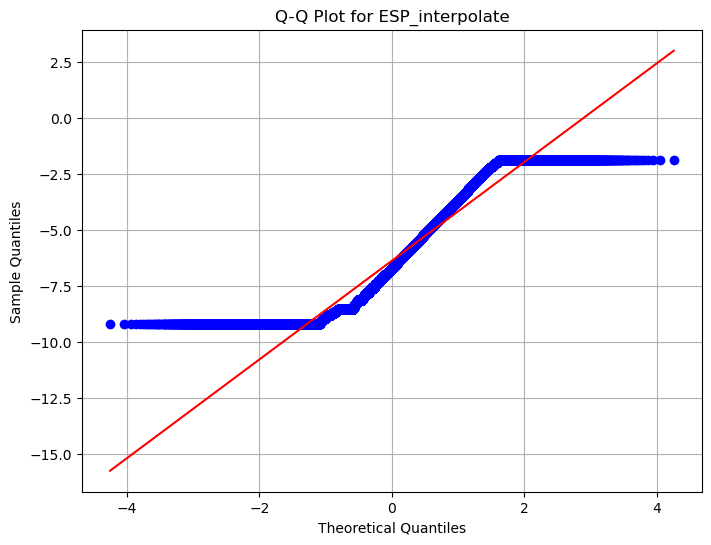

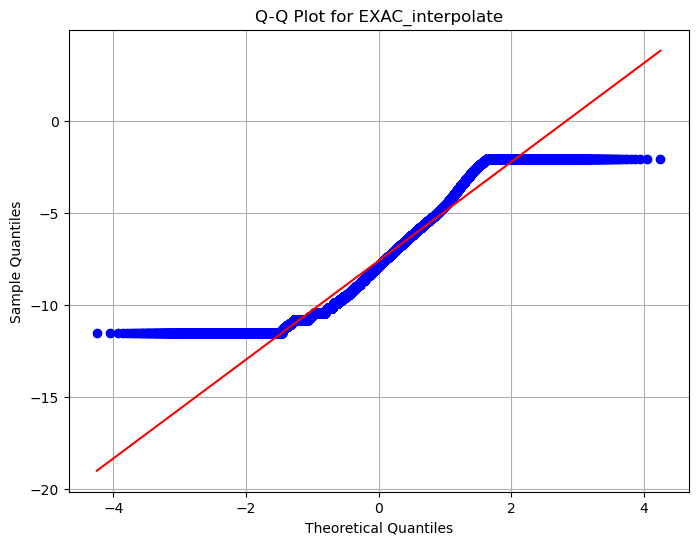

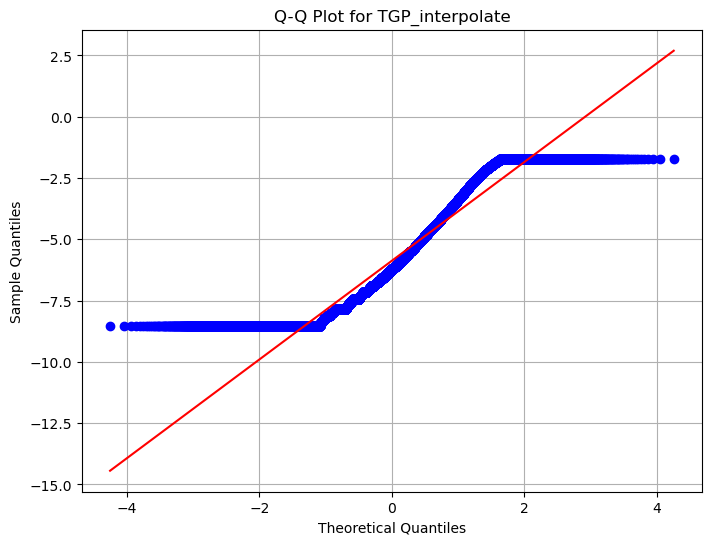

In [396]:
# Generate Q-Q plots for each log-transformed column
for column in log_transformed_df.columns:
    plt.figure(figsize=(8, 6))
    stats.probplot(log_transformed_df[column], dist='norm', plot=plt) 
    plt.title("Q-Q Plot for " + column)
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

In [397]:
from scipy.stats import kruskal

column1 = log_transformed_df['ESP_interpolate']
column2 = log_transformed_df['EXAC_interpolate']
column3 = log_transformed_df['TGP_interpolate']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(column1, column2, column3)

print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis test statistic: 15796.747220659709
p-value: 0.0


In [398]:
from scipy.stats import wilcoxon

for column in log_transformed_df.columns:
    statistic, p_value = wilcoxon(log_transformed_df[column])
    print("Wilcoxon signed-rank test for", column)
    print("Test statistic:", statistic)
    print("p-value:", p_value)
    if p_value > 0.05:
        print("There is no significant difference between the paired samples.\n")
    else:
        print("There is a significant difference between the paired samples.\n")

Wilcoxon signed-rank test for ESP_interpolate
Test statistic: 0.0
p-value: 0.0
There is a significant difference between the paired samples.

Wilcoxon signed-rank test for EXAC_interpolate
Test statistic: 0.0
p-value: 0.0
There is a significant difference between the paired samples.

Wilcoxon signed-rank test for TGP_interpolate
Test statistic: 0.0
p-value: 0.0
There is a significant difference between the paired samples.



Unfortunately, the three allele frequency columns are still proving to be not normally distributed and remain statistically different. However, the distribution has been improved via interpolation and log transformation. Additonal nonparametric tests in the future may be beneficial when building the model. More data on the significance will be analyzed in the future when the model is implemented with different combinations of the allele frequency columns. 

In [399]:
allele_final = log_transformed_df.copy()

allele_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ESP_interpolate   65188 non-null  float64
 1   EXAC_interpolate  65188 non-null  float64
 2   TGP_interpolate   65188 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [400]:
allele_final['MEAN_AF'] = allele_final[['ESP_interpolate', 'EXAC_interpolate', 'TGP_interpolate']].mean(axis=1)

allele_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ESP_interpolate   65188 non-null  float64
 1   EXAC_interpolate  65188 non-null  float64
 2   TGP_interpolate   65188 non-null  float64
 3   MEAN_AF           65188 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


I've decided to engineer a 'MEAN_AF' column in the allele dataframe that calculates the mean of all three allele columns. This is primarily for experimentation. I may end up dropping it from the model in the future due to the issue of non-normality. Let's now insert our new allele columns in the main 'df' dataframe.

In [401]:
# Join the interpolated columns from 'allele_final' to 'df'
df = df.join(allele_final[['ESP_interpolate', 'EXAC_interpolate', 'TGP_interpolate']])

# Drop the old columns
df.drop(['AF_ESP', 'AF_EXAC', 'AF_TGP'], axis=1, inplace=True)

# Rename the interpolated columns 
df.rename(columns={'ESP_interpolate': 'New_ESP', 'EXAC_interpolate': 'New_EXAC', 'TGP_interpolate': 'New_TGP'}, inplace=True)

# Add the 'MEAN_AF' column from 'allele_final' to 'df'
df['New_MEAN_AF'] = allele_final['MEAN_AF']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDISDB          65188 non-null  object 
 5   CLNDN             65188 non-null  object 
 6   CLNHGVS           65188 non-null  object 
 7   CLNVC             65188 non-null  object 
 8   CLNVI             27659 non-null  object 
 9   MC                64342 non-null  object 
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  object 
 13  Consequence       65188 non-null  object 
 14  IMPACT            65188 non-null  object 
 15  SYMBOL            65172 non-null  object 
 16  Feature_type      65174 non-null  object

Now that the allele columns are cleaned, we must separate the numeric and non-numeric columns again. This is because numbers and objects are treated differently when analyzing data.

In [402]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS          65188 non-null  int64  
 1   ORIGIN       65188 non-null  int64  
 2   CLASS        65188 non-null  int64  
 3   STRAND       65174 non-null  float64
 4   LoFtool      60975 non-null  float64
 5   CADD_PHRED   64096 non-null  float64
 6   CADD_RAW     64096 non-null  float64
 7   BLOSUM62     25593 non-null  float64
 8   New_ESP      65188 non-null  float64
 9   New_EXAC     65188 non-null  float64
 10  New_TGP      65188 non-null  float64
 11  New_MEAN_AF  65188 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 6.0 MB


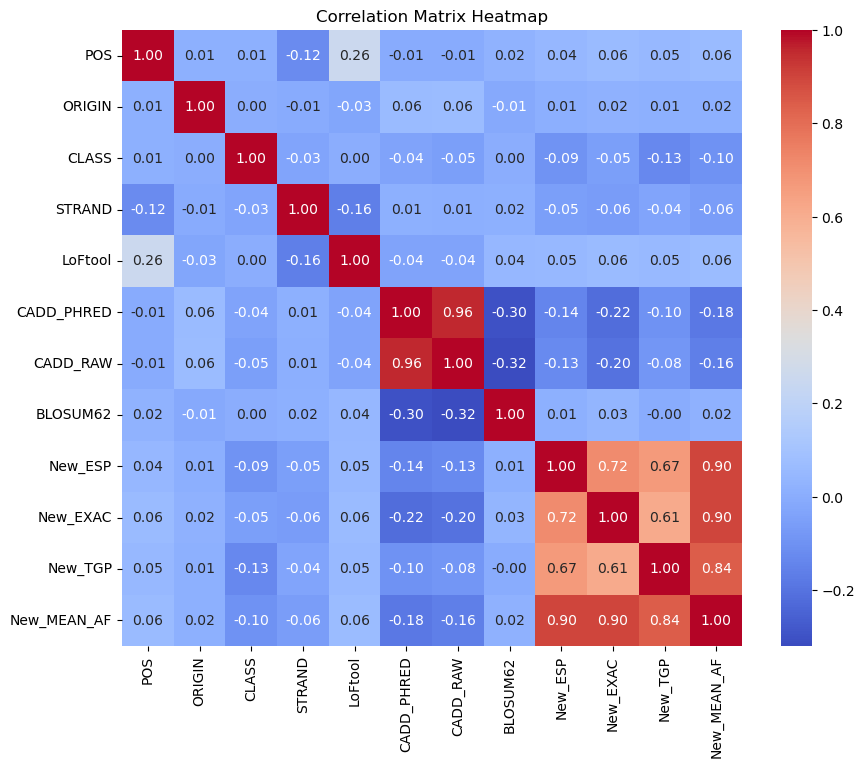

In [403]:
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation heat map is improving. Interestingly, the high correlations amongst the transformed allele columns have been reduced after the introduction of the 'New_MEAN_AF' column. While the ratios are still high, it's good to note a reduction. I can't drop any of them yet though due to a recurring issue of non-normality.

The map shows a couple more points of high correlation outside of the disculled allele frequencies. Specifically, there is high correlation between CADD_RAW and CADD_PHRED (0.96). This makes sense in the context of genetic pathogenicity. 

CADD = Combined Annotation Dependent Depletion

CADD Raw = continuous score that measures deleteriousness of a genetic variant, can be positive or negative.

CADD Phred = a normalized and transformed version of CADD Raw, Phred-like scale, logarithmically scaled and rounded, ranges from 1-99.

For this project, CADD_Phred will be used for 3 reasons:

1. Standardized Scale = ranges from 1-99, sets appropriate thresholds
2. Population Comparison = Phred-like scale makes it easier to compare
3. Large Sample Size = handles a large sample size of over 60,000 better than CADD Raw by providing a discrete scale.

Thus, CADD Raw will be dropped from the dataframe. 

In [404]:
df = df.drop('CADD_RAW', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDISDB          65188 non-null  object 
 5   CLNDN             65188 non-null  object 
 6   CLNHGVS           65188 non-null  object 
 7   CLNVC             65188 non-null  object 
 8   CLNVI             27659 non-null  object 
 9   MC                64342 non-null  object 
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  object 
 13  Consequence       65188 non-null  object 
 14  IMPACT            65188 non-null  object 
 15  SYMBOL            65172 non-null  object 
 16  Feature_type      65174 non-null  object

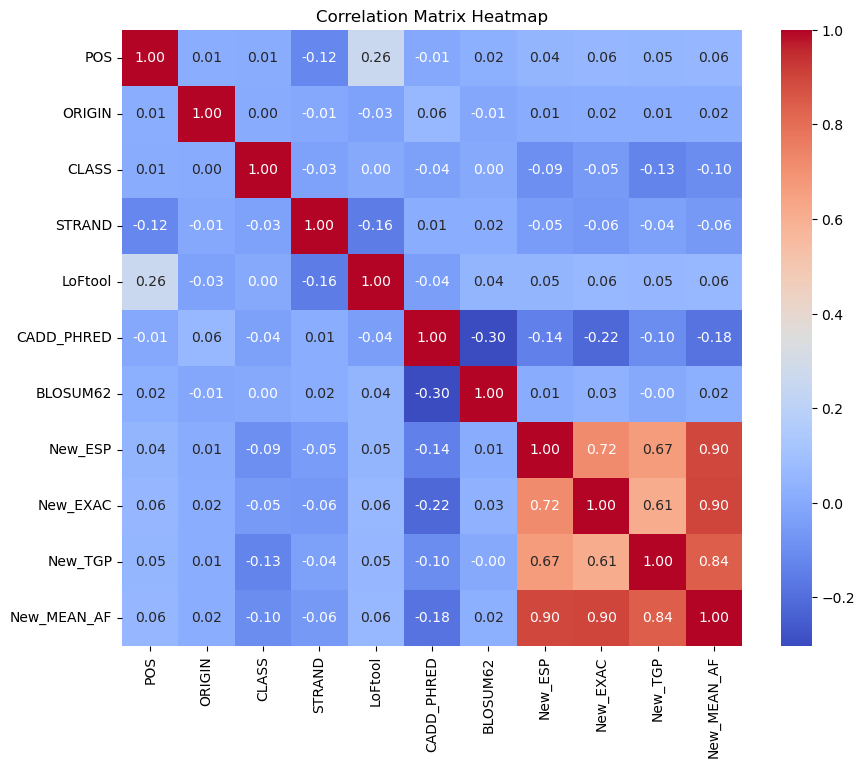

In [405]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [406]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS          65188 non-null  int64  
 1   ORIGIN       65188 non-null  int64  
 2   CLASS        65188 non-null  int64  
 3   STRAND       65174 non-null  float64
 4   LoFtool      60975 non-null  float64
 5   CADD_PHRED   64096 non-null  float64
 6   BLOSUM62     25593 non-null  float64
 7   New_ESP      65188 non-null  float64
 8   New_EXAC     65188 non-null  float64
 9   New_TGP      65188 non-null  float64
 10  New_MEAN_AF  65188 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 5.5 MB


Numerical columns are improving. However, the column 'BLOSUM62' has a high percentage of missing values.

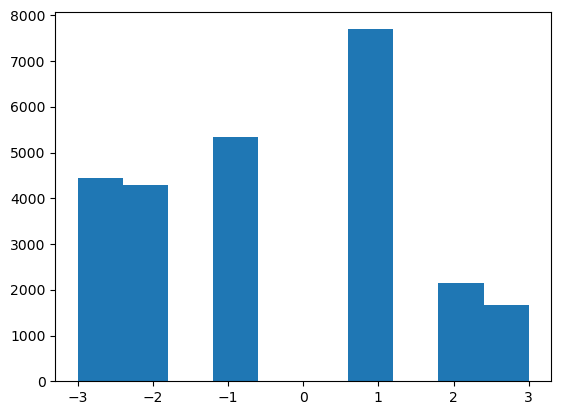

In [407]:
plt.hist(df['BLOSUM62'])
plt.show()

In [408]:
df['BLOSUM62'].nunique()

6

In [409]:
summary_stats = df['BLOSUM62'].describe()
print(summary_stats)

count    25593.000000
mean        -0.402258
std          1.872684
min         -3.000000
25%         -2.000000
50%         -1.000000
75%          1.000000
max          3.000000
Name: BLOSUM62, dtype: float64


In [410]:
# Drop missing values from the column
column_without_missing = df['BLOSUM62'].dropna()

# Perform Shapiro-Wilk test
shapiro_statistic, shapiro_p_value = shapiro(column_without_missing)
print("Shapiro-Wilk Test - Statistic:", shapiro_statistic)
print("Shapiro-Wilk Test - p-value:", shapiro_p_value)

Shapiro-Wilk Test - Statistic: 0.8984495997428894
Shapiro-Wilk Test - p-value: 0.0


C:\Users\Jody\anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The BLOSUM62 column statistically proves to be non-normally distributed. I've decided to drop this column for this reason along with the high null percentage of 60%.

In [411]:
df = df.drop('BLOSUM62', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDISDB          65188 non-null  object 
 5   CLNDN             65188 non-null  object 
 6   CLNHGVS           65188 non-null  object 
 7   CLNVC             65188 non-null  object 
 8   CLNVI             27659 non-null  object 
 9   MC                64342 non-null  object 
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  object 
 13  Consequence       65188 non-null  object 
 14  IMPACT            65188 non-null  object 
 15  SYMBOL            65172 non-null  object 
 16  Feature_type      65174 non-null  object

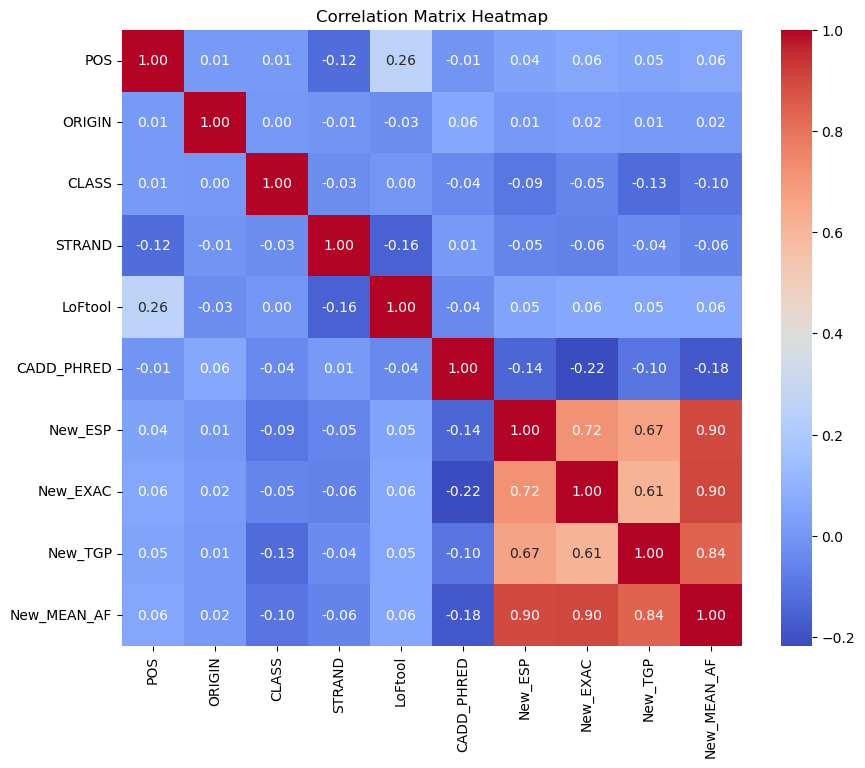

In [412]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

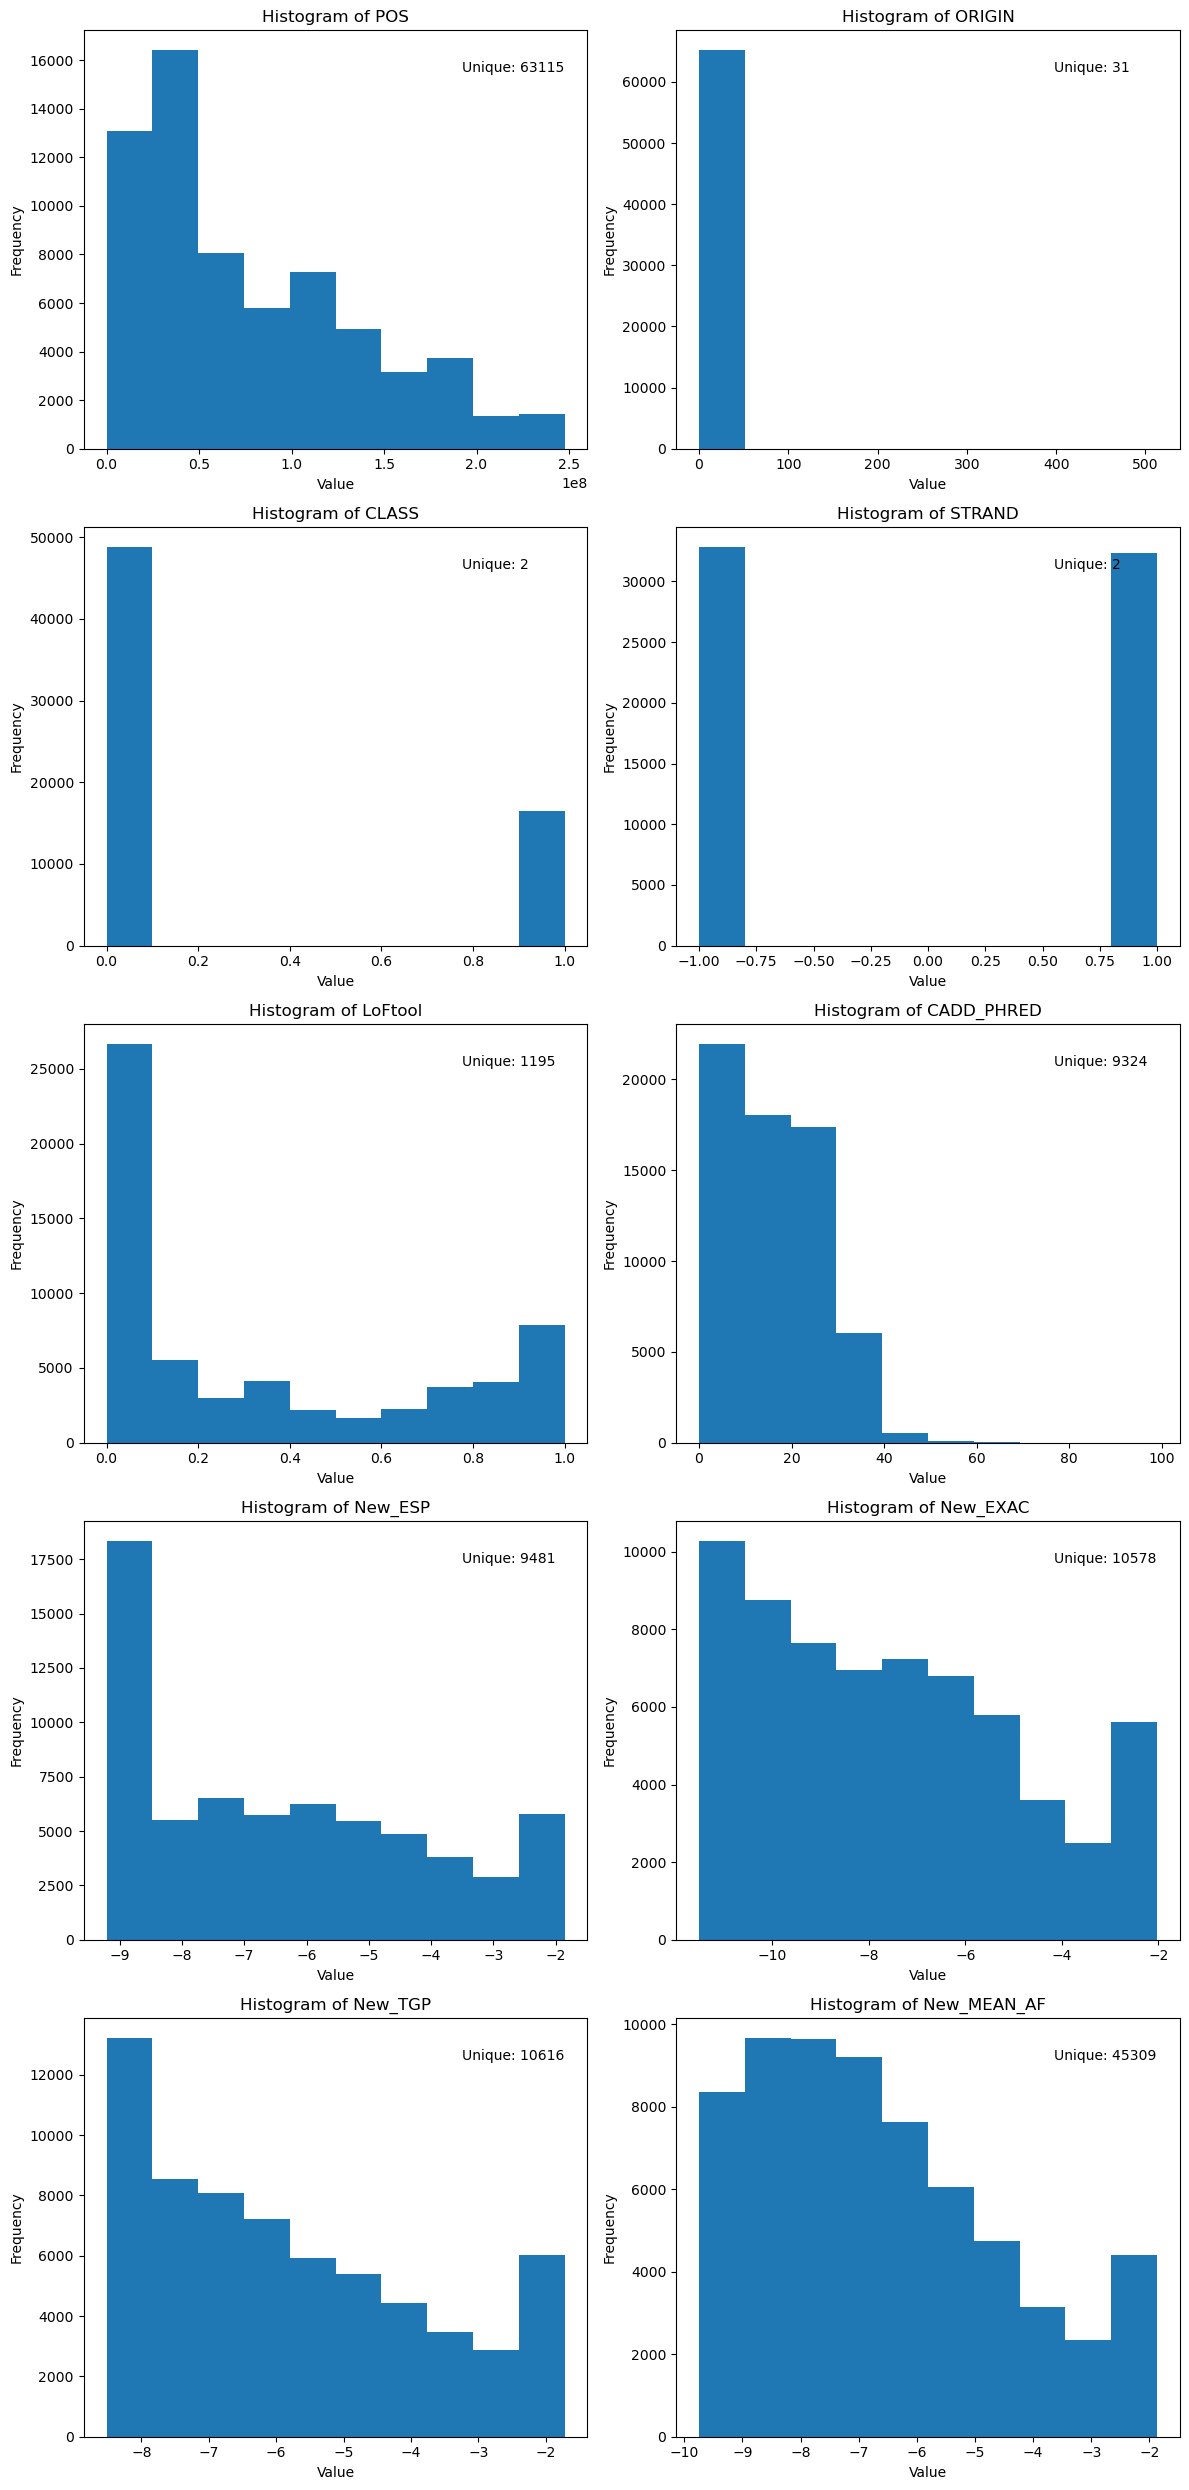

In [413]:
# Calculate the number of rows and columns for the subplots
num_cols = len(numerical_columns.columns)
num_rows = (num_cols + 1) // 2

# Create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows*5))

# Iterate through each column
for i, column in enumerate(numerical_columns.columns):
    # Calculate the subplot position
    row = i // 2
    col = i % 2
    
    # Plot histogram for the current column
    axes[row, col].hist(numerical_columns[column].dropna(), bins=10)
    axes[row, col].set_title(f"Histogram of {column}")
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")

    # Print unique value counts
    unique_vals = numerical_columns[column].nunique()
    axes[row, col].text(0.75, 0.9, f"Unique: {unique_vals}", transform=axes[row, col].transAxes)

# Hide unused subplots if the number of columns is odd
if num_cols % 2 != 0:
    axes[-1, -1].axis("off")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

Of the plots generated above, 'CLASS' and 'STRAND' appear to be binary with only two unique values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STRAND      65174 non-null  float64
 1   LoFtool     60975 non-null  float64
 2   CADD_PHRED  64096 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STRAND      65188 non-null  float64
 1   LoFtool     65188 non-null  float64
 2   CADD_PHRED  65188 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


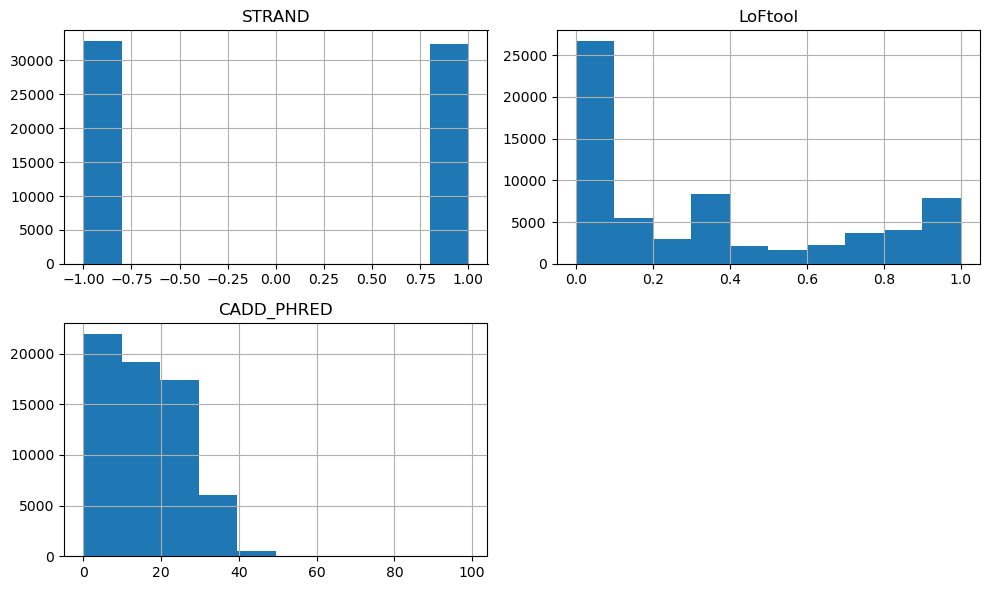

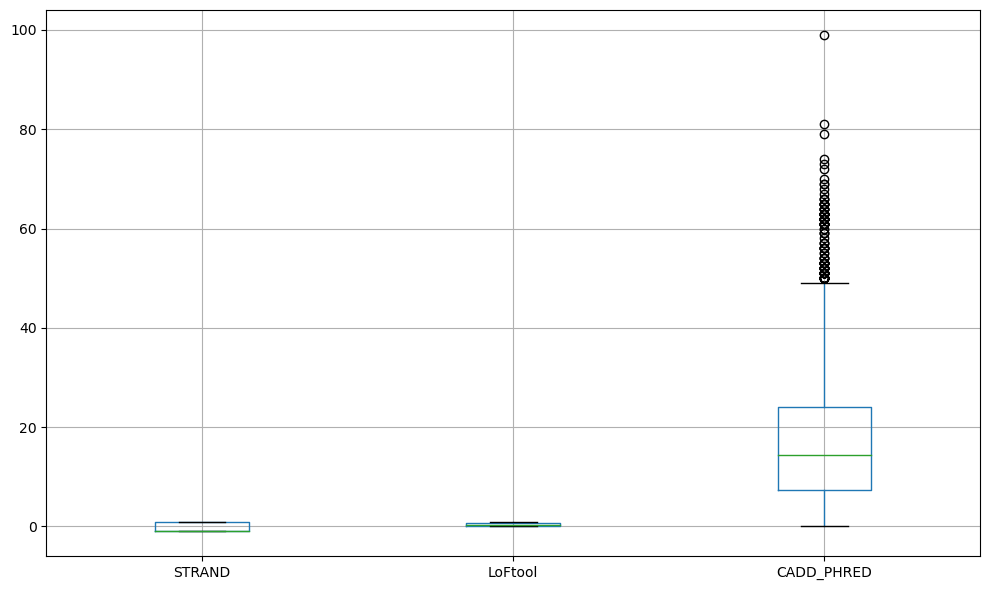

In [414]:
leftover_numeric = df[['STRAND', 'LoFtool', 'CADD_PHRED']]

leftover_numeric.info()

df['STRAND'].fillna(df['STRAND'].mode().iloc[0], inplace=True)

leftover_numeric = leftover_numeric.fillna(leftover_numeric.mean())
leftover_numeric.info()


# Generate histograms
leftover_numeric.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Generate boxplots
leftover_numeric.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

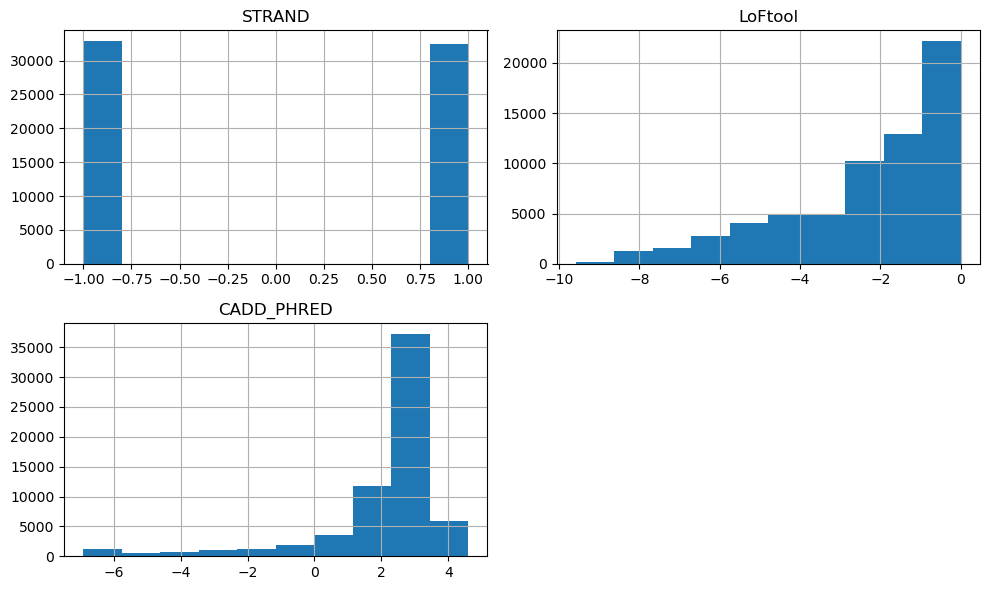

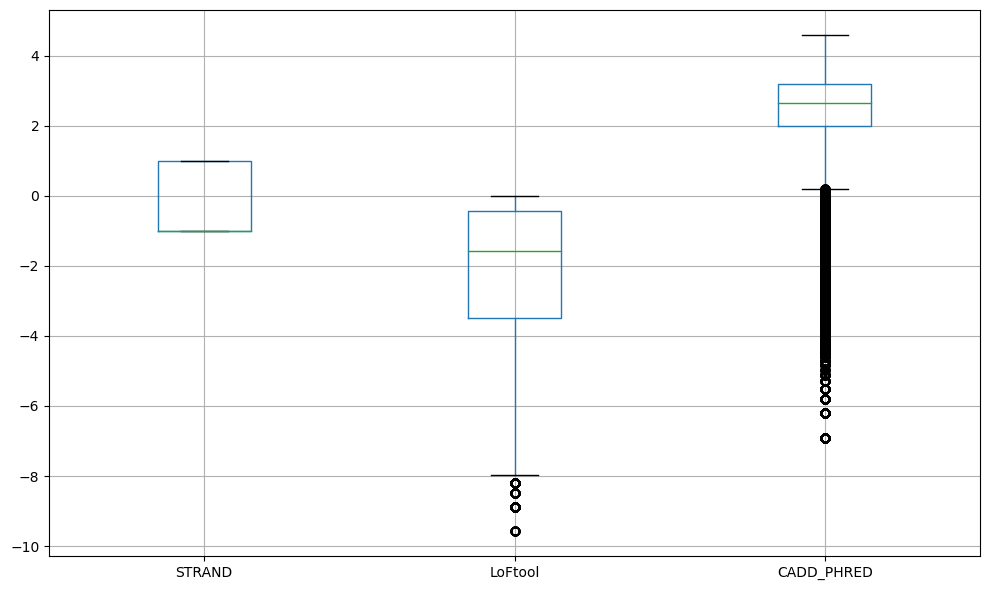

Shapiro-Wilk Test:
Test Statistic: 0.6373509168624878
p-value: 0.0


C:\Users\Jody\anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [415]:
leftover_numeric_log = leftover_numeric.copy()

# Replace invalid values with NaN
leftover_numeric_log['CADD_PHRED'].replace(0, np.nan, inplace=True)

# Apply logarithm after replacing invalid values
leftover_numeric_log['LoFtool'] = np.log(leftover_numeric['LoFtool'])
leftover_numeric_log['CADD_PHRED'] = np.log(leftover_numeric_log['CADD_PHRED'])
leftover_numeric_log['STRAND'] = df['STRAND']

# Generate histograms
leftover_numeric_log.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Generate boxplots
leftover_numeric_log.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test on 'leftover_numeric'
statistic, p_value = shapiro(leftover_numeric['STRAND'])

print("Shapiro-Wilk Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

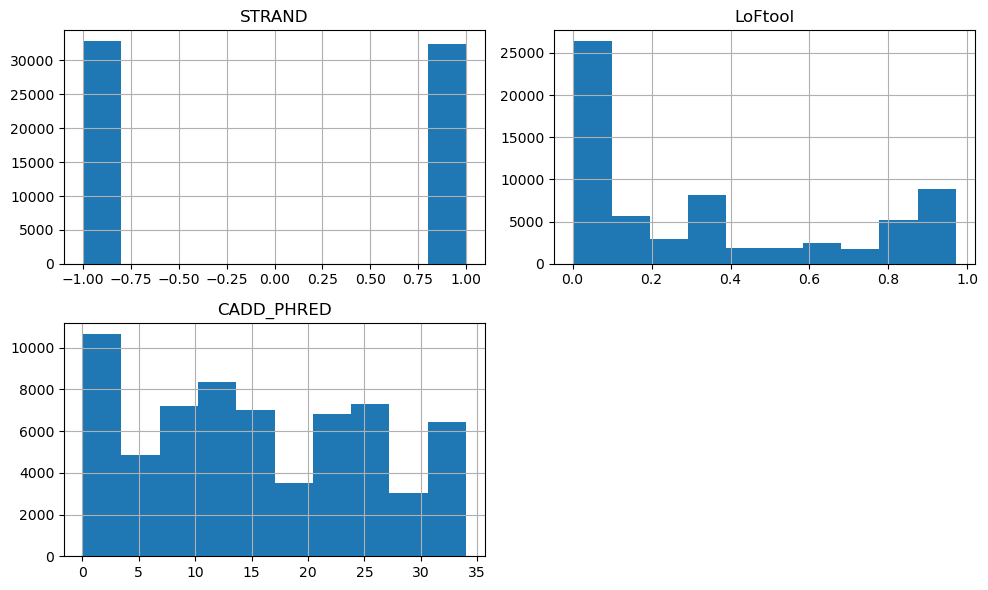

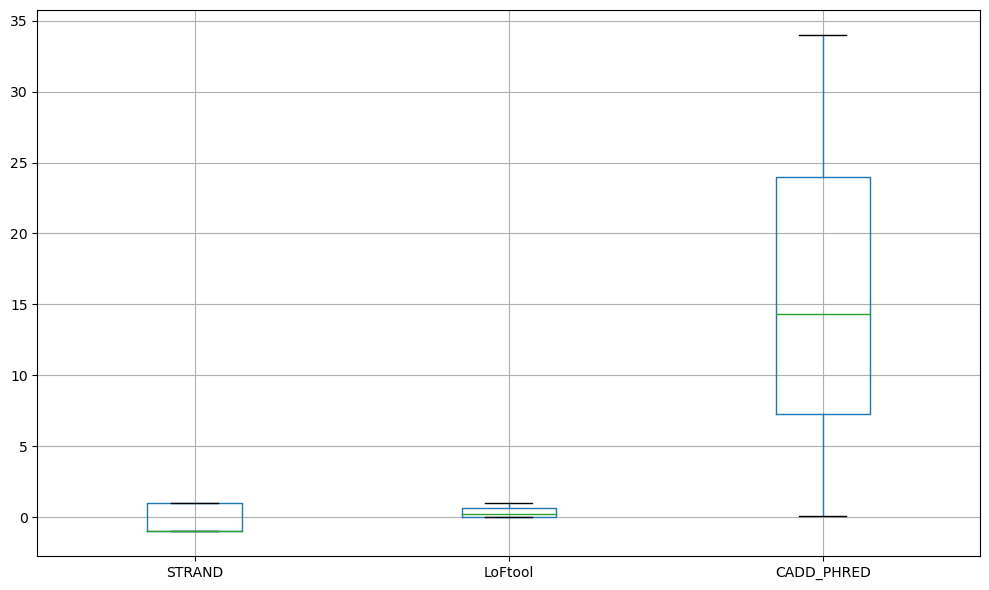

In [416]:
from scipy.stats import mstats

# Apply winsorization column-wise
leftover_numeric_winsorized = leftover_numeric.apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))

# Generate histograms after winsorization
leftover_numeric_winsorized.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Generate boxplots after winsorization
leftover_numeric_winsorized.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

At first, winsorization appears to have removed all of the outliers. However, the histograms look more normal after log transformation. The only problem with log transformation is there are several outliers in the 'CADD_PHRED' column boxplot after transformation. 

Let's add a constant to the log transformation of 'CADD_PHRED' to counteract the remaining outliers.

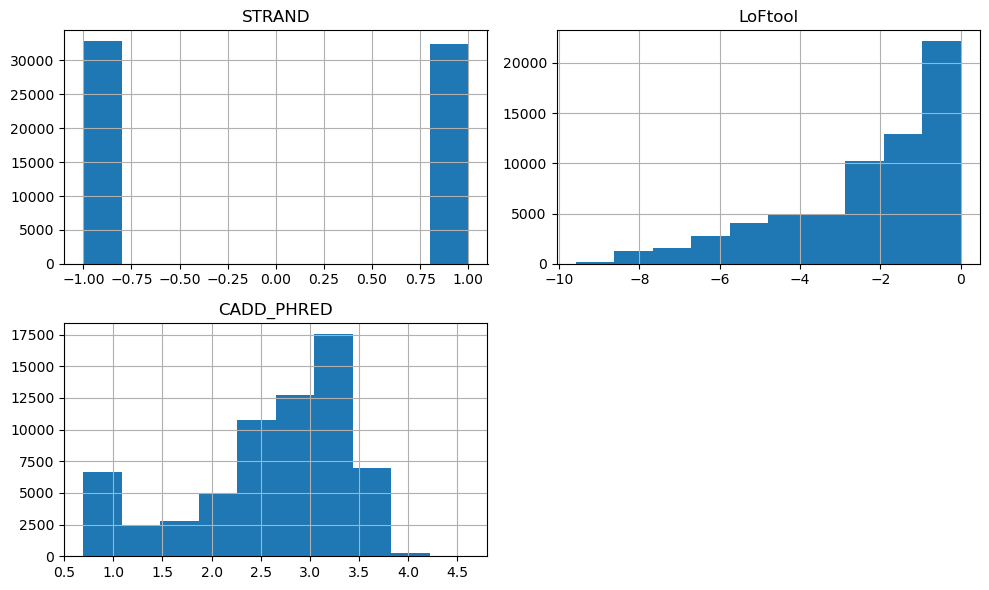

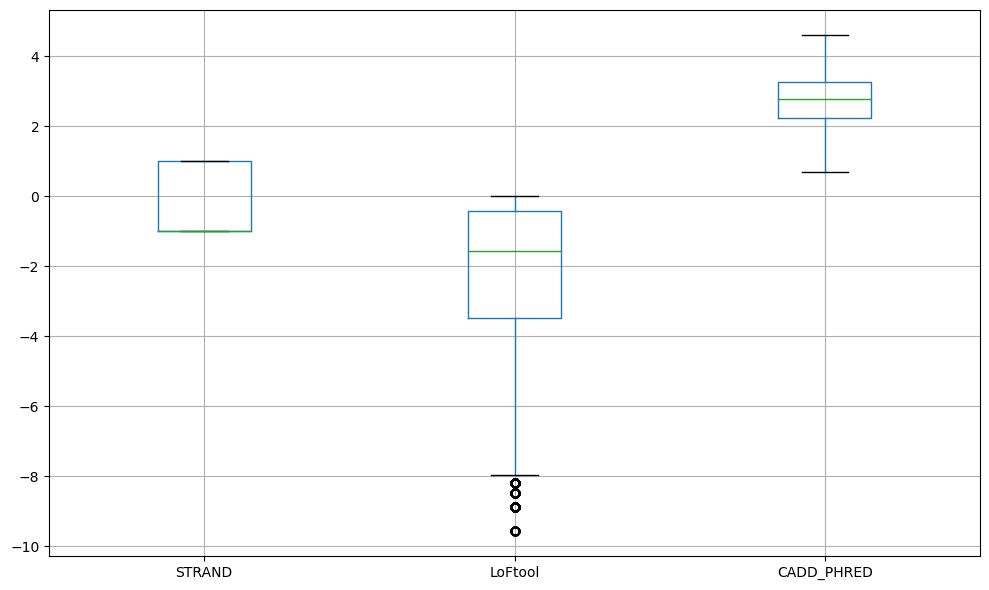

Shapiro-Wilk Test:
Test Statistic: 0.6639655828475952
p-value: 0.0


C:\Users\Jody\anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [417]:
from scipy.stats import shapiro

leftover_numeric_log = leftover_numeric.copy()

leftover_numeric_log['STRAND'] = leftover_numeric['STRAND']
leftover_numeric_log['LoFtool'] = np.log(leftover_numeric['LoFtool'])
leftover_numeric_log['CADD_PHRED'] = np.log(leftover_numeric['CADD_PHRED'] + 2)  # Adding a constant before taking the log

# Generate histograms
leftover_numeric_log.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Generate boxplots
leftover_numeric_log.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

statistic, p_value = shapiro(leftover_numeric)

print("Shapiro-Wilk Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

In [418]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test between original data and log-transformed data
statistic_log, p_value_log = ks_2samp(leftover_numeric.values.flatten(), leftover_numeric_log.values.flatten())

# Perform Kolmogorov-Smirnov test between original data and winsorized data
statistic_winsorized, p_value_winsorized = ks_2samp(leftover_numeric.values.flatten(), leftover_numeric_winsorized.values.flatten())

print("Kolmogorov-Smirnov Test - Log Transformation:")
print("Test Statistic:", statistic_log)
print("p-value:", p_value_log)

print("Kolmogorov-Smirnov Test - Winsorization:")
print("Test Statistic:", statistic_winsorized)
print("p-value:", p_value_winsorized)

Kolmogorov-Smirnov Test - Log Transformation:
Test Statistic: 0.33333333333333337
p-value: 0.0
Kolmogorov-Smirnov Test - Winsorization:
Test Statistic: 0.018776461925507748
p-value: 2.2384120745364816e-30


Now, the columns appear to be more normally distributed and log transformation takes the win.

In [419]:
df.update(leftover_numeric_log)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDISDB          65188 non-null  object 
 5   CLNDN             65188 non-null  object 
 6   CLNHGVS           65188 non-null  object 
 7   CLNVC             65188 non-null  object 
 8   CLNVI             27659 non-null  object 
 9   MC                64342 non-null  object 
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  object 
 13  Consequence       65188 non-null  object 
 14  IMPACT            65188 non-null  object 
 15  SYMBOL            65172 non-null  object 
 16  Feature_type      65174 non-null  object

In [420]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POS          65188 non-null  int64  
 1   ORIGIN       65188 non-null  int64  
 2   CLASS        65188 non-null  int64  
 3   STRAND       65188 non-null  float64
 4   LoFtool      65188 non-null  float64
 5   CADD_PHRED   65188 non-null  float64
 6   New_ESP      65188 non-null  float64
 7   New_EXAC     65188 non-null  float64
 8   New_TGP      65188 non-null  float64
 9   New_MEAN_AF  65188 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 5.0 MB


The numeric columns in the dataframe have now been cleaned and transformed. Let's now shift our focus to the variables labeled as objects.

In [421]:
object_cols = df.select_dtypes(include=['object'])
object_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHROM             65188 non-null  object
 1   REF               65188 non-null  object
 2   ALT               65188 non-null  object
 3   CLNDISDB          65188 non-null  object
 4   CLNDN             65188 non-null  object
 5   CLNHGVS           65188 non-null  object
 6   CLNVC             65188 non-null  object
 7   CLNVI             27659 non-null  object
 8   MC                64342 non-null  object
 9   Allele            65188 non-null  object
 10  Consequence       65188 non-null  object
 11  IMPACT            65188 non-null  object
 12  SYMBOL            65172 non-null  object
 13  Feature_type      65174 non-null  object
 14  Feature           65174 non-null  object
 15  BIOTYPE           65172 non-null  object
 16  EXON              56295 non-null  object
 17  INTRON      

Now that we have our new dataframe with isolated object columns, we can begin examining null values.

In [422]:
# create dataframe of missing percentages and visualize

missing_percentage_df = pd.DataFrame(columns=['Column', 'Missing Percentage'])

for column in object_cols.columns:
    missing_percentage = (object_cols[column].isnull().sum() / len(object_cols)) * 100
    missing_percentage_df = pd.concat([missing_percentage_df, pd.DataFrame({'Column': [column], 'Missing Percentage': [missing_percentage]})], ignore_index=True)

# descending order 

missing_percentage_df = missing_percentage_df.sort_values('Missing Percentage', ascending=False)
print(missing_percentage_df)

              Column  Missing Percentage
17            INTRON           86.495981
25          PolyPhen           61.962324
24              SIFT           61.900963
7              CLNVI           57.570412
23          BAM_EDIT           50.958765
22            Codons           15.346383
21       Amino_acids           15.346383
20  Protein_position           15.271216
19      CDS_position           15.271216
16              EXON           13.642081
18     cDNA_position           13.628275
8                 MC            1.297785
15           BIOTYPE            0.024544
12            SYMBOL            0.024544
13      Feature_type            0.021476
14           Feature            0.021476
1                REF            0.000000
11            IMPACT            0.000000
10       Consequence            0.000000
9             Allele            0.000000
6              CLNVC            0.000000
5            CLNHGVS            0.000000
4              CLNDN            0.000000
3           CLND

In [423]:
object_cols.head(10)

,CHROM,REF,ALT,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,MC,Allele,...,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,BAM_EDIT,SIFT,PolyPhen
0,1,G,C,MedGen:CN169374,not_specified,NC_000001.10:g.1168180G>C,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,C,...,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,tolerated,benign
1,1,G,A,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",Spinocerebellar_ataxia_21|not_provided,NC_000001.10:g.1470752G>A,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,A,...,4/4,NaN,523,509,170,P/L,cCg/cTg,OK,deleterious_low_confidence,benign
2,1,A,G,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NC_000001.10:g.1737942A>G,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",G,...,6/12,NaN,632,239,80,I/T,aTc/aCc,OK,deleterious,probably_damaging
3,1,G,A,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160305G>A,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,A,...,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,NaN,NaN
4,1,G,T,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",Shprintzen-Goldberg_syndrome,NC_000001.10:g.2160305G>T,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,T,...,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,NaN,NaN
5,1,G,C,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160554G>C,single_nucleotide_variant,UniProtKB_(protein):P12755#VAR_071183,SO:0001583|missense_variant,C,...,1/7,NaN,381,349,117,G/R,Ggc/Cgc,NaN,NaN,NaN
6,1,T,C,MedGen:CN169374,not_specified,NC_000001.10:g.3328358T>C,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031433,SO:0001583|missense_variant,C,...,9/17,NaN,1858,1600,534,S/P,Tcg/Ccg,NaN,NaN,NaN
7,1,C,T,MedGen:CN169374,not_specified,NC_000001.10:g.3328659C>T,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031434,SO:0001583|missense_variant,T,...,9/17,NaN,2159,1901,634,P/L,cCt/cTt,NaN,NaN,NaN
8,1,G,A,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",Left_ventricular_noncompaction_8|not_specified...,NC_000001.10:g.3347452G>A,single_nucleotide_variant,OMIM_Allelic_Variant:605557.0004|UniProtKB_(pr...,SO:0001583|missense_variant,A,...,15/17,NaN,3562,3304,1102,V/M,Gtg/Atg,NaN,NaN,NaN
9,1,G,A,"MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...",Nephronophthisis|not_specified,NC_000001.10:g.5925304G>A,single_nucleotide_variant,UniProtKB_(protein):O75161#VAR_022546,SO:0001583|missense_variant,A,...,27/30,NaN,3942,3674,1225,T/M,aCg/aTg,NaN,deleterious,benign


In [424]:
# isolate objects whose values appear to be abnormal

weird_objects = object_cols[['CHROM', 'cDNA_position', 
                             'CDS_position', 'Protein_position']]

weird_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHROM             65188 non-null  object
 1   cDNA_position     56304 non-null  object
 2   CDS_position      55233 non-null  object
 3   Protein_position  55233 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB


The four columns above were chosen because each column is theoretically supposed to contain numeric values, but python has classified them as objects due to data issues. Specifically, there appears to be '-' (hyphens) in a small percentage of cells. I've decided to strip the '-' and all values after it in each cell due to my currently limited data cleaning skills.

In [425]:
# iterate through each column and perform string manipulation
for column in weird_objects.columns:
    if weird_objects[column].apply(lambda x: isinstance(x, str)).all():
        weird_objects.loc[:, column] = weird_objects[column].str.split('-').str[0].copy()
        

# convert to numeric to finish
weird_objects = weird_objects.apply(pd.to_numeric, errors='coerce')

weird_objects.info()

C:\Users\Jody\AppData\Local\Temp\ipykernel_35192\3269370692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weird_objects.loc[:, column] = weird_objects[column].str.split('-').str[0].copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             63246 non-null  float64
 1   cDNA_position     54028 non-null  float64
 2   CDS_position      53032 non-null  float64
 3   Protein_position  54027 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


Columns have now been converted to floats. It's time to send these new columns down our data cleaning pipeline. This includes analyzing nulls, outliers, and distributions.

In [426]:
for col in weird_objects.columns:
    null_count = weird_objects[col].isnull().sum()
    total_rows = len(weird_objects)
    missing_percentage = (null_count / total_rows) * 100
    
    print(f"Column '{col}' has a missing percentage of {missing_percentage:.2f}%")

Column 'CHROM' has a missing percentage of 2.98%
Column 'cDNA_position' has a missing percentage of 17.12%
Column 'CDS_position' has a missing percentage of 18.65%
Column 'Protein_position' has a missing percentage of 17.12%


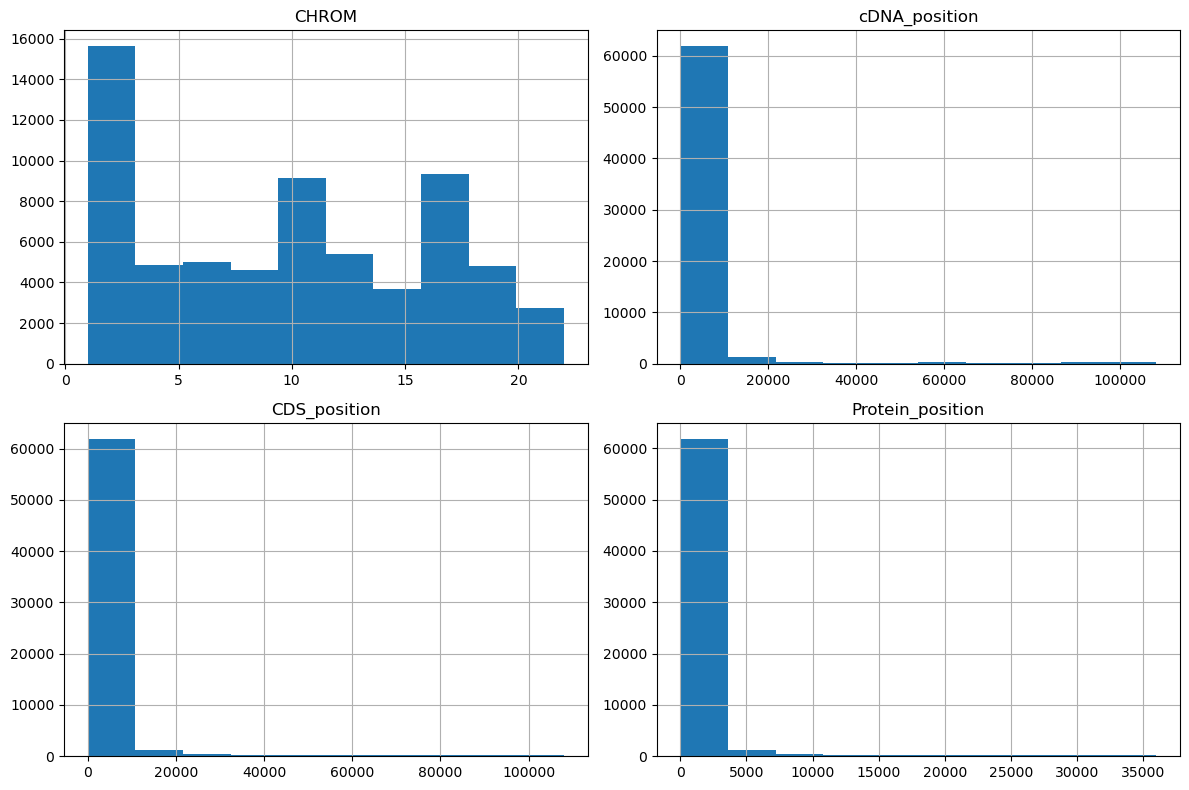

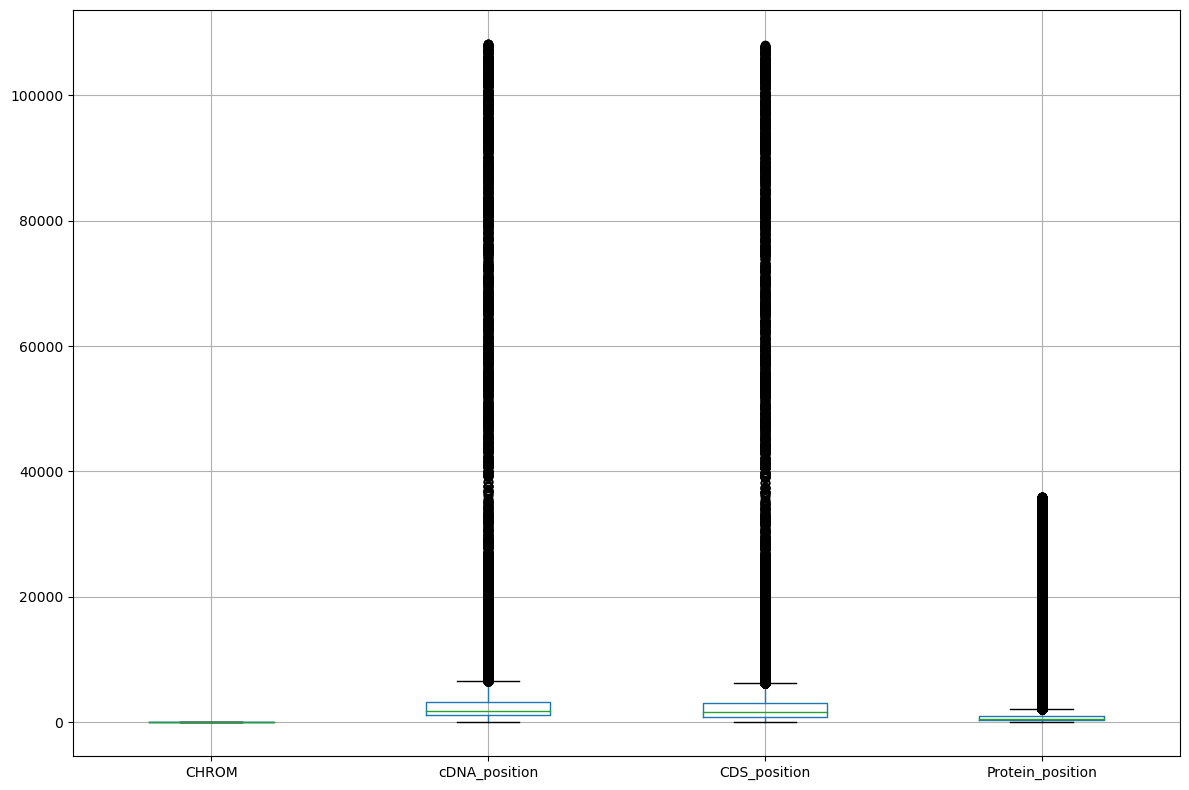

In [427]:
# Calculate the median of each column
column_medians = weird_objects.median()

# Fill null values with column medians
weird_objects_filled = weird_objects.fillna(column_medians)

# Plot histograms of filled data
weird_objects_filled.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot boxplots of filled data
weird_objects_filled.boxplot(figsize=(12, 8))
plt.tight_layout()
plt.show()

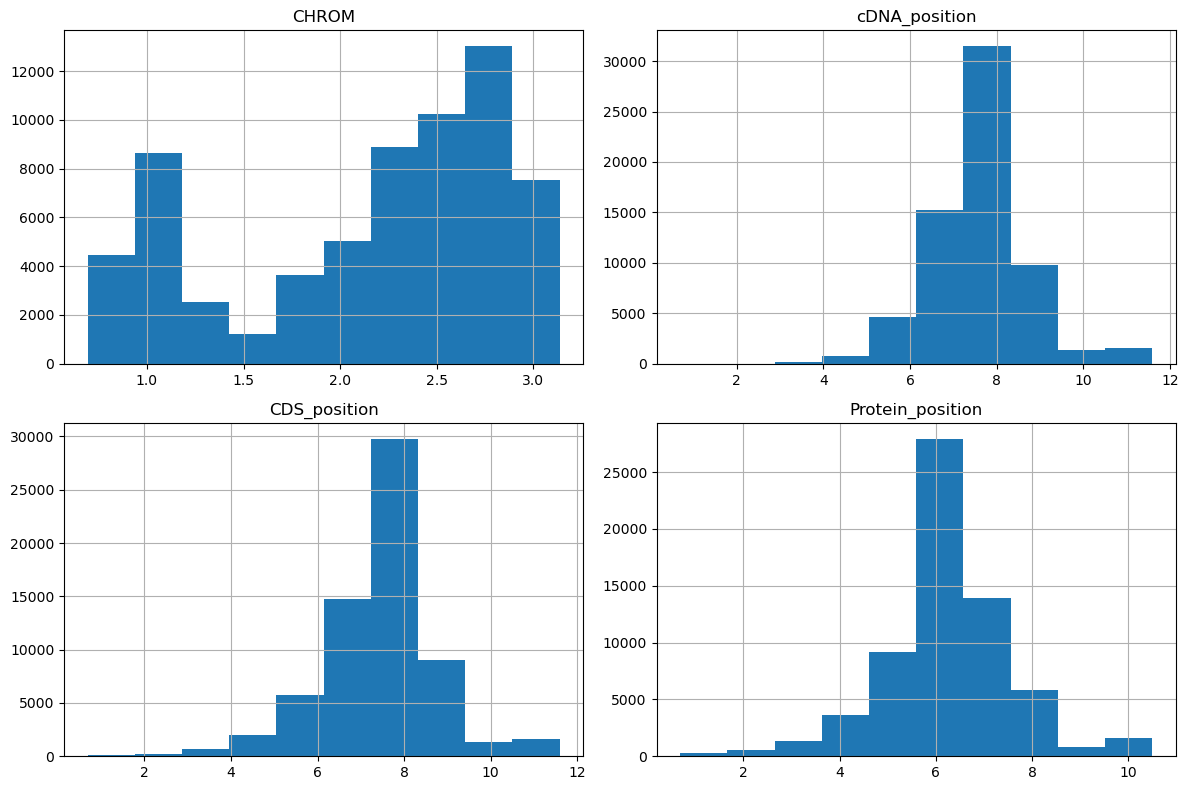

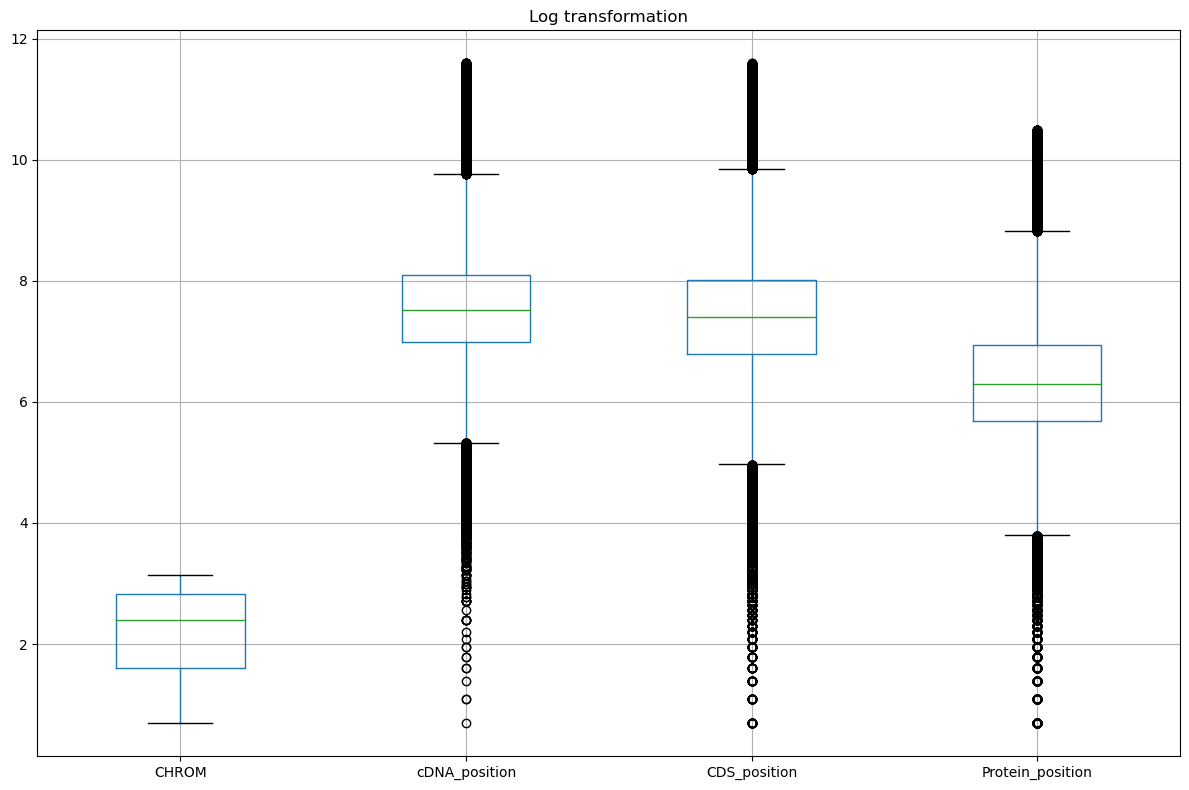

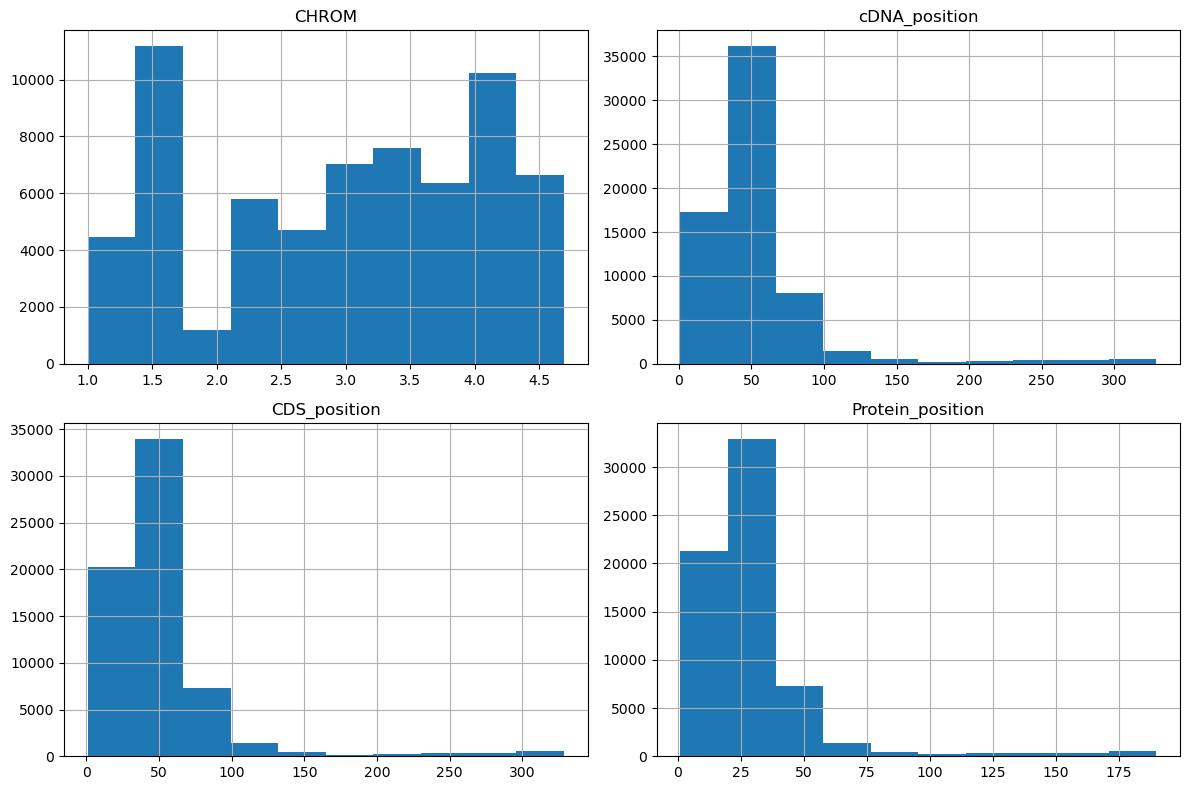

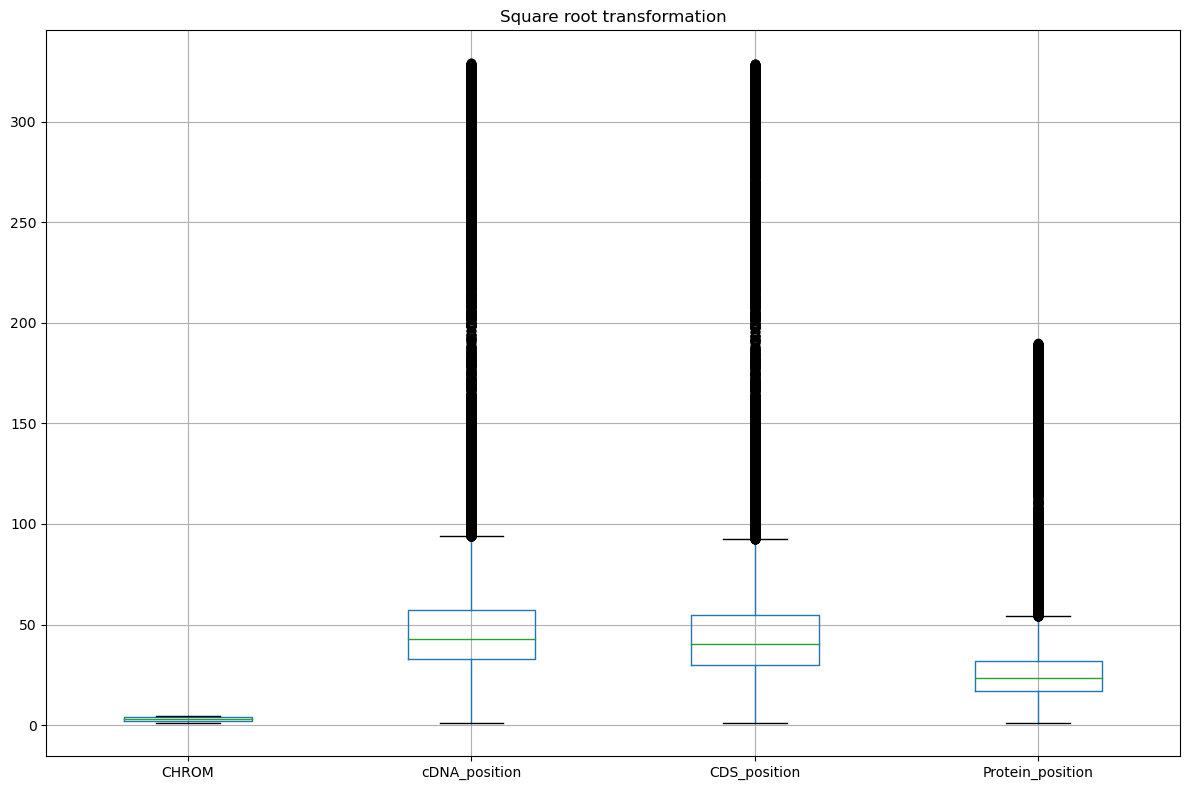

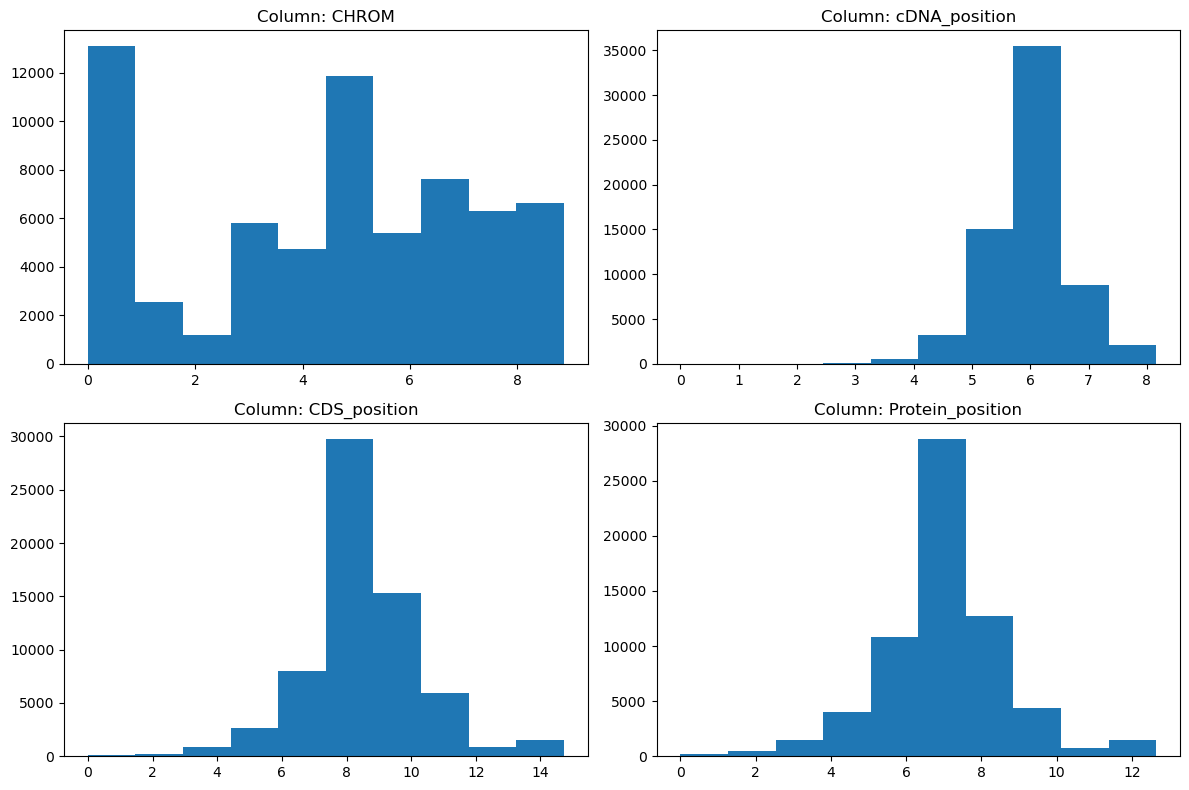

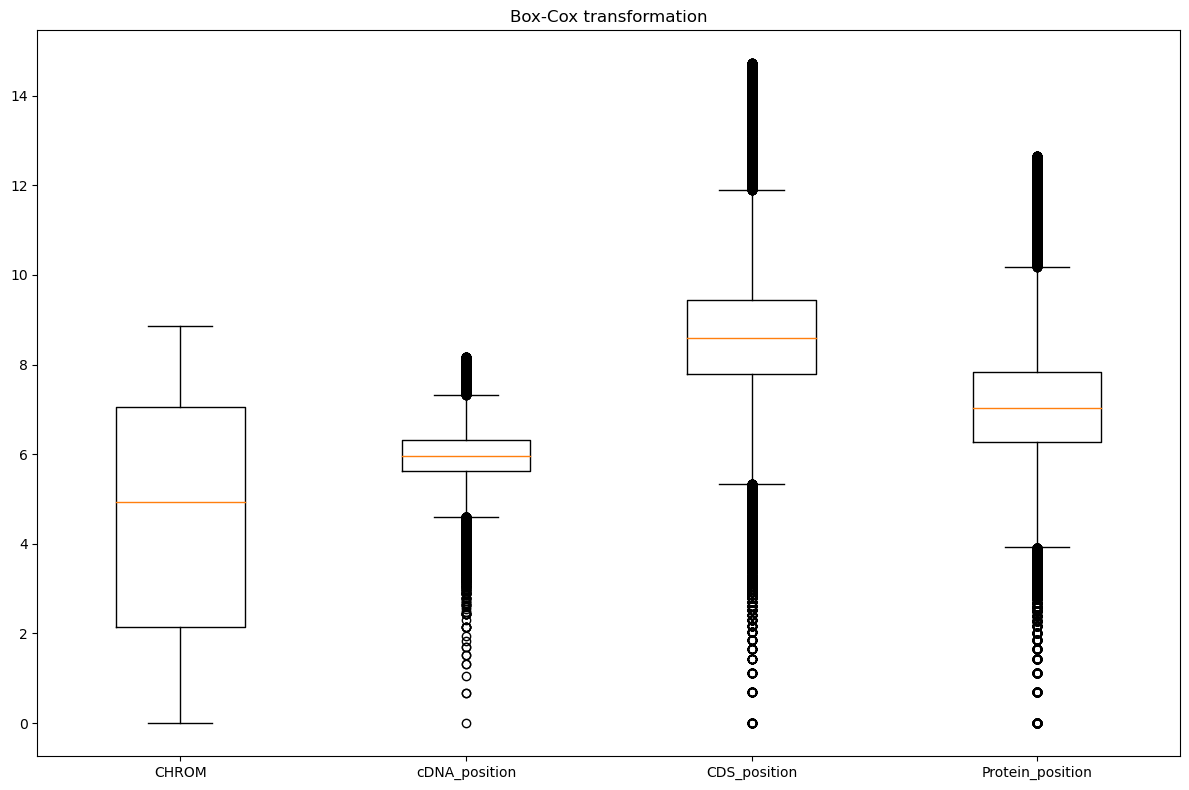

In [428]:
from scipy.stats import boxcox

# Log transform the data
weird_objects_log = np.log1p(weird_objects_filled)

# Plot histograms of log-transformed data
weird_objects_log.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot boxplots of log-transformed data
weird_objects_log.boxplot(figsize=(12, 8))
plt.title("Log transformation")
plt.tight_layout()
plt.show()

# Apply Box-Cox transformation to each column
weird_objects_boxcox = pd.DataFrame()
shift = 1e-6  # Small positive constant

for col in weird_objects_filled.columns:
    if np.all(weird_objects_filled[col] > 0):
        transformed_data, _ = boxcox(weird_objects_filled[col])
        weird_objects_boxcox[col] = transformed_data
    else:
        shifted_data = weird_objects_filled[col] + shift
        transformed_data, _ = boxcox(shifted_data)
        weird_objects_boxcox[col] = transformed_data

# Plot histograms of square root transformed data
weird_objects_sqrt = np.sqrt(weird_objects_filled)
weird_objects_sqrt.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot boxplots of square root transformed data
weird_objects_sqrt.boxplot(figsize=(12, 8))
plt.title("Square root transformation")
plt.tight_layout()
plt.show()

# Plot histograms of Box-Cox transformed data
plt.figure(figsize=(12, 8))
for i, column in enumerate(weird_objects_boxcox.columns):
    plt.subplot(2, 2, i+1)
    plt.hist(weird_objects_boxcox[column], bins=10)
    plt.title(f'Column: {column}')
plt.tight_layout()
plt.show()

# Plot boxplots of Box-Cox transformed data
plt.figure(figsize=(12, 8))
plt.boxplot(weird_objects_boxcox.values, labels=weird_objects_boxcox.columns)
plt.title('Box-Cox transformation')
plt.tight_layout()
plt.show()

Of the three transformations attempted, Box-Cox and log transformations work best on the data. Let's generate some QQ plots to identify which one of the two is best.

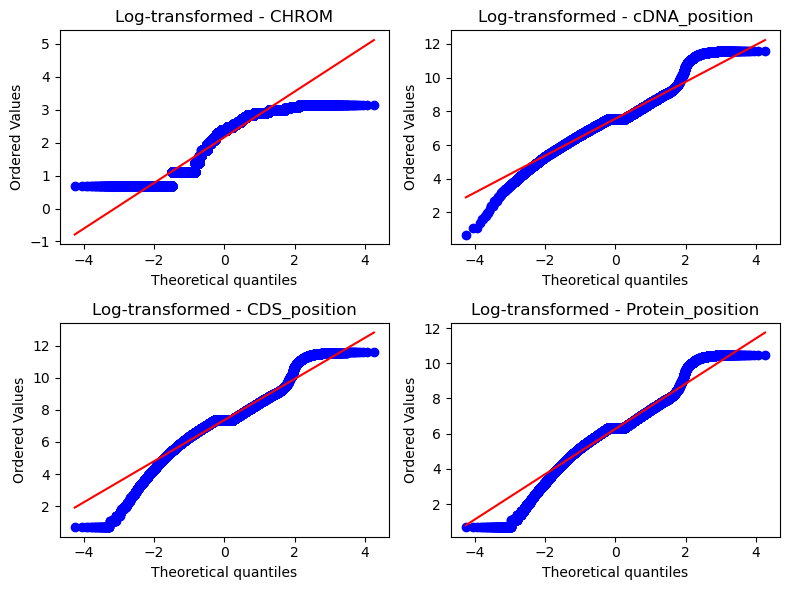

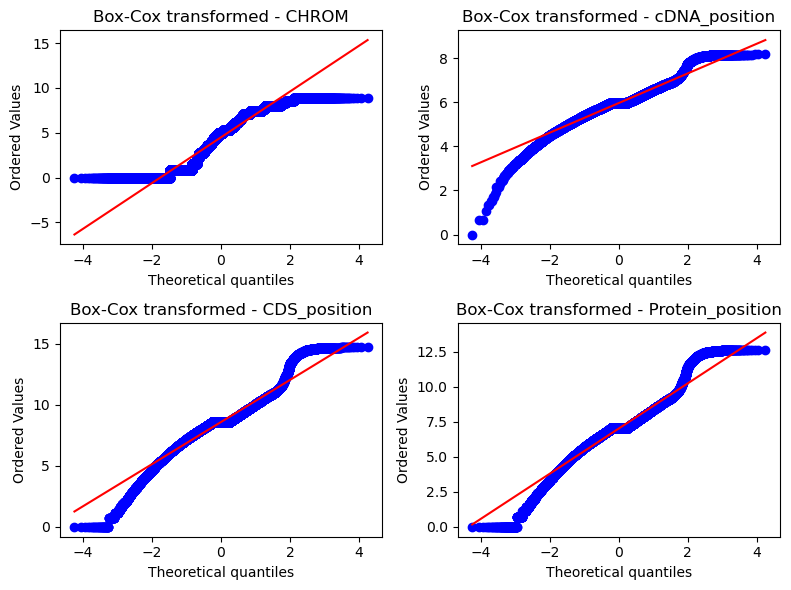

In [429]:
from scipy.stats import probplot

# Create QQ plot for log-transformed data
plt.figure(figsize=(8, 6))
for i, col in enumerate(weird_objects_log.columns):
    plt.subplot(2, len(weird_objects_log.columns)//2, i+1)
    probplot(weird_objects_log[col], plot=plt)
    plt.title(f'Log-transformed - {col}')
plt.tight_layout()
plt.show()

# Create QQ plot for Box-Cox transformed data
plt.figure(figsize=(8, 6))
for i, col in enumerate(weird_objects_boxcox.columns):
    plt.subplot(2, len(weird_objects_boxcox.columns)//2, i+1)
    probplot(weird_objects_boxcox[col], plot=plt)
    plt.title(f'Box-Cox transformed - {col}')
plt.tight_layout()
plt.show()


The Q-Q plots above indicate that Box-Cox transformation outperforms log transformation by a small fraction. Thus, Box-Cox transformation will be used with this specific data.

Let's now re-insert the updated and cleaned columns into the main dataframe and then visualize our new 'numerical' columns.

In [430]:
df.update(weird_objects_boxcox)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDISDB          65188 non-null  object 
 5   CLNDN             65188 non-null  object 
 6   CLNHGVS           65188 non-null  object 
 7   CLNVC             65188 non-null  object 
 8   CLNVI             27659 non-null  object 
 9   MC                64342 non-null  object 
 10  ORIGIN            65188 non-null  int64  
 11  CLASS             65188 non-null  int64  
 12  Allele            65188 non-null  object 
 13  Consequence       65188 non-null  object 
 14  IMPACT            65188 non-null  object 
 15  SYMBOL            65172 non-null  object 
 16  Feature_type      65174 non-null  object

In [431]:
non_numeric = df.select_dtypes(include=[object])
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHROM             65188 non-null  object
 1   REF               65188 non-null  object
 2   ALT               65188 non-null  object
 3   CLNDISDB          65188 non-null  object
 4   CLNDN             65188 non-null  object
 5   CLNHGVS           65188 non-null  object
 6   CLNVC             65188 non-null  object
 7   CLNVI             27659 non-null  object
 8   MC                64342 non-null  object
 9   Allele            65188 non-null  object
 10  Consequence       65188 non-null  object
 11  IMPACT            65188 non-null  object
 12  SYMBOL            65172 non-null  object
 13  Feature_type      65174 non-null  object
 14  Feature           65174 non-null  object
 15  BIOTYPE           65172 non-null  object
 16  EXON              56295 non-null  object
 17  INTRON      

In [432]:
non_numeric.head()

,CHROM,REF,ALT,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,MC,Allele,...,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,BAM_EDIT,SIFT,PolyPhen
0,0.0,G,C,MedGen:CN169374,not_specified,NC_000001.10:g.1168180G>C,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,C,...,1/1,NaN,5.184907,7.104058,5.647848,E/D,gaG/gaC,NaN,tolerated,benign
1,0.0,G,A,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",Spinocerebellar_ataxia_21|not_provided,NC_000001.10:g.1470752G>A,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,A,...,4/4,NaN,5.148948,7.071738,5.620061,P/L,cCg/cTg,OK,deleterious_low_confidence,benign
2,0.0,A,G,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NC_000001.10:g.1737942A>G,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",G,...,6/12,NaN,5.274539,6.117786,4.731438,I/T,aTc/aCc,OK,deleterious,probably_damaging
3,0.0,G,A,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160305G>A,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,A,...,1/7,NaN,4.187879,5.053284,3.750366,G/S,Ggc/Agc,NaN,NaN,NaN
4,0.0,G,T,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",Shprintzen-Goldberg_syndrome,NC_000001.10:g.2160305G>T,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,T,...,1/7,NaN,4.187879,5.053284,3.750366,G/C,Ggc/Tgc,NaN,NaN,NaN


To further reduce complexity of our future model, there are a few more object columns that can be dropped.

1. BAM_EDIT = Binary Map Alignment, indicates whether it's stored in a particular database, not relevant.
2. INTRON = severely low amount of non-null values
3. EXON = contains dates, not performing time series, not relevant
4. CLNDISB = Provides MedGen database identifiers, not relevant
5. CLNHGVS = provides database identifier, not relevant
6. MC = repeat of Consequence with additional database identifier
7. CLNVI = lab location identifier, not relevant for current project.
8. SYMBOL = another identifier

In [433]:
df.drop(['BAM_EDIT', 'INTRON', 'EXON', 'CLNDISDB', 'CLNHGVS', 'MC', 'CLNVI', 'SYMBOL'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDN             65188 non-null  object 
 5   CLNVC             65188 non-null  object 
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  object 
 9   Consequence       65188 non-null  object 
 10  IMPACT            65188 non-null  object 
 11  Feature_type      65174 non-null  object 
 12  Feature           65174 non-null  object 
 13  BIOTYPE           65172 non-null  object 
 14  cDNA_position     65188 non-null  object 
 15  CDS_position      65188 non-null  object 
 16  Protein_position  65188 non-null  object

In [434]:
non_numeric = df.select_dtypes(include=[object])
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHROM             65188 non-null  object
 1   REF               65188 non-null  object
 2   ALT               65188 non-null  object
 3   CLNDN             65188 non-null  object
 4   CLNVC             65188 non-null  object
 5   Allele            65188 non-null  object
 6   Consequence       65188 non-null  object
 7   IMPACT            65188 non-null  object
 8   Feature_type      65174 non-null  object
 9   Feature           65174 non-null  object
 10  BIOTYPE           65172 non-null  object
 11  cDNA_position     65188 non-null  object
 12  CDS_position      65188 non-null  object
 13  Protein_position  65188 non-null  object
 14  Amino_acids       55184 non-null  object
 15  Codons            55184 non-null  object
 16  SIFT              24836 non-null  object
 17  PolyPhen    

In [435]:
non_numeric.head()

,CHROM,REF,ALT,CLNDN,CLNVC,Allele,Consequence,IMPACT,Feature_type,Feature,BIOTYPE,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,SIFT,PolyPhen
0,0.0,G,C,not_specified,single_nucleotide_variant,C,missense_variant,MODERATE,Transcript,NM_080605.3,protein_coding,5.184907,7.104058,5.647848,E/D,gaG/gaC,tolerated,benign
1,0.0,G,A,Spinocerebellar_ataxia_21|not_provided,single_nucleotide_variant,A,missense_variant,MODERATE,Transcript,NM_001114748.1,protein_coding,5.148948,7.071738,5.620061,P/L,cCg/cTg,deleterious_low_confidence,benign
2,0.0,A,G,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,single_nucleotide_variant,G,missense_variant,MODERATE,Transcript,NM_002074.4,protein_coding,5.274539,6.117786,4.731438,I/T,aTc/aCc,deleterious,probably_damaging
3,0.0,G,A,Shprintzen-Goldberg_syndrome|not_provided,single_nucleotide_variant,A,missense_variant,MODERATE,Transcript,XM_005244775.1,protein_coding,4.187879,5.053284,3.750366,G/S,Ggc/Agc,NaN,NaN
4,0.0,G,T,Shprintzen-Goldberg_syndrome,single_nucleotide_variant,T,missense_variant,MODERATE,Transcript,XM_005244775.1,protein_coding,4.187879,5.053284,3.750366,G/C,Ggc/Tgc,NaN,NaN


In [436]:
unique_counts = non_numeric.nunique()

# Sort the columns based on the number of unique variables
sorted_columns = unique_counts.sort_values()

# Print the sorted columns and their corresponding unique counts
print("Unique counts:\n")
for column in sorted_columns.index:
    unique_count = sorted_columns[column]
    print(f"{column}: {unique_count}")

Unique counts:

Feature_type: 2
BIOTYPE: 2
SIFT: 4
IMPACT: 4
PolyPhen: 4
CLNVC: 7
CHROM: 22
Consequence: 48
Allele: 374
ALT: 458
REF: 866
Amino_acids: 1262
Codons: 2220
Feature: 2369
Protein_position: 6332
CLNDN: 9260
CDS_position: 11660
cDNA_position: 11889


We're starting to understand our object variables a bit better now. There's a few things I notice:

1. 'Allele' should only have 4 values (AGTC) in terms of genetic knowledge.
2. ALT and REF should also only have 4 values (AGTC) in terms of genetic knowledge.

Let's clean those columns so that there are only 4 unique values for each.

In [437]:
# Assuming 'df' is your DataFrame
columns_to_clean = ['Allele', 'REF', 'ALT']

for column in columns_to_clean:
    for i, value in enumerate(df[column]):
        if value not in ['A', 'G', 'T', 'C']:
            df.at[i, column] = None  # Replace with None for null

for column in columns_to_clean:
    unique_values = df[column].unique()
    unique_count = df[column].nunique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Unique Value Count: {unique_count}")
    print()

Column: Allele
Unique Values: ['C' 'A' 'G' 'T' None]
Unique Value Count: 4

Column: REF
Unique Values: ['G' 'A' 'T' 'C' None]
Unique Value Count: 4

Column: ALT
Unique Values: ['C' 'A' 'G' 'T' None]
Unique Value Count: 4



In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               62425 non-null  object 
 3   ALT               63825 non-null  object 
 4   CLNDN             65188 non-null  object 
 5   CLNVC             65188 non-null  object 
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            61949 non-null  object 
 9   Consequence       65188 non-null  object 
 10  IMPACT            65188 non-null  object 
 11  Feature_type      65174 non-null  object 
 12  Feature           65174 non-null  object 
 13  BIOTYPE           65172 non-null  object 
 14  cDNA_position     65188 non-null  object 
 15  CDS_position      65188 non-null  object 
 16  Protein_position  65188 non-null  object

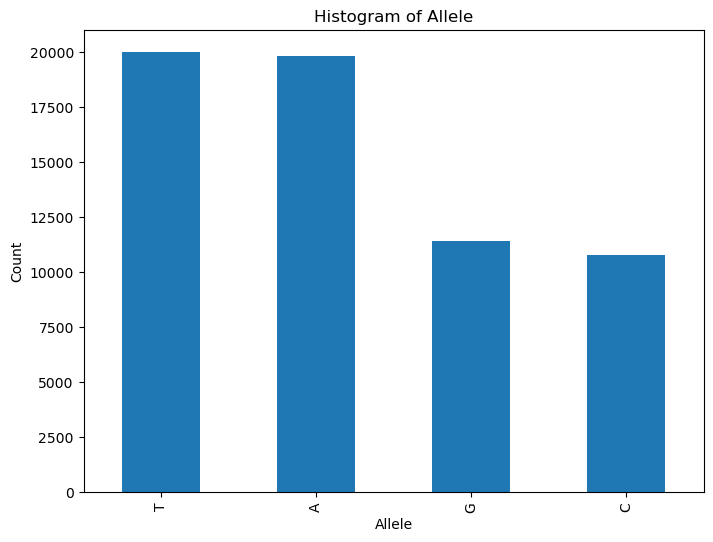

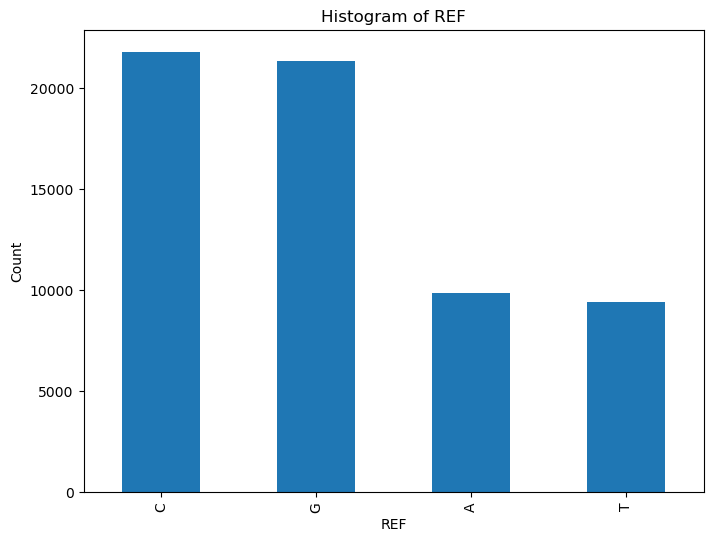

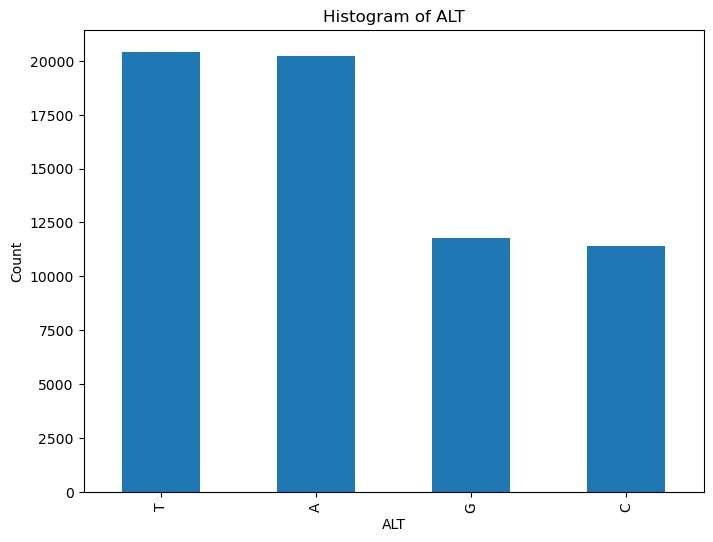

In [439]:
columns_to_plot = ['Allele', 'REF', 'ALT']

# iterate and plot histograms of isolated columns
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

There are very few missing values in all 3 columns. Thus, I've chosen to imput the missing values with the mode of the respective variables since they are categorical variables with only 4 unique values each.

In [440]:
columns_to_impute = ['REF', 'ALT', 'Allele']

for column in columns_to_impute:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDN             65188 non-null  object 
 5   CLNVC             65188 non-null  object 
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  object 
 9   Consequence       65188 non-null  object 
 10  IMPACT            65188 non-null  object 
 11  Feature_type      65174 non-null  object 
 12  Feature           65174 non-null  object 
 13  BIOTYPE           65172 non-null  object 
 14  cDNA_position     65188 non-null  object 
 15  CDS_position      65188 non-null  object 
 16  Protein_position  65188 non-null  object

The unique values of object columns that appeared earlier show that various features are very clearly categorical. Such categorical variables are:

1. REF (Reference allele): The original allele of a gene, commonly found in the population.
2. ALT (Altered allele): The mutated allele of a gene, representing an alternative form of the genetic sequence compared to the reference allele.
3. CLNVC (Clinical variant class): Describes the type or category of a genetic variant based on its clinical significance or functional impact.
4. IMPACT: Indicates the functional consequence of a genetic variant on the gene or protein product.
5. SIFT: Predicts the potential impact of amino acid substitutions caused by genetic variants on protein function based on sequence conservation and other factors.
6. PolyPhen: Predicts the possible functional consequences of amino acid substitutions caused by genetic variants on protein structure and function.
7. Consequence: Resulting DNA mutation (such as missense a mutation).

However, we have encountered more redundancy with respect to genetic domain knowledge. Feature_type, BIOTYPE, and Feature all only have 2 values that are already included in the Consequence column. They don't add any additional information to the model. Thus, they can be dropped.

In [441]:
df.drop(['Feature', 'Feature_type', 'BIOTYPE'], axis=1, inplace=True)

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDN             65188 non-null  object 
 5   CLNVC             65188 non-null  object 
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  object 
 9   Consequence       65188 non-null  object 
 10  IMPACT            65188 non-null  object 
 11  cDNA_position     65188 non-null  object 
 12  CDS_position      65188 non-null  object 
 13  Protein_position  65188 non-null  object 
 14  Amino_acids       55184 non-null  object 
 15  Codons            55184 non-null  object 
 16  STRAND            65188 non-null  float6

In [443]:
df_object = df.select_dtypes(include='object')

print("Unique Counts:\n")
    
for column in df_object.columns:
    unique_values = df_object[column].nunique()
    print(f"{column}: {unique_values}")

Unique Counts:

CHROM: 22
REF: 4
ALT: 4
CLNDN: 9260
CLNVC: 7
Allele: 4
Consequence: 48
IMPACT: 4
cDNA_position: 11889
CDS_position: 11660
Protein_position: 6332
Amino_acids: 1262
Codons: 2220
SIFT: 4
PolyPhen: 4


In [444]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHROM             65188 non-null  object
 1   REF               65188 non-null  object
 2   ALT               65188 non-null  object
 3   CLNDN             65188 non-null  object
 4   CLNVC             65188 non-null  object
 5   Allele            65188 non-null  object
 6   Consequence       65188 non-null  object
 7   IMPACT            65188 non-null  object
 8   cDNA_position     65188 non-null  object
 9   CDS_position      65188 non-null  object
 10  Protein_position  65188 non-null  object
 11  Amino_acids       55184 non-null  object
 12  Codons            55184 non-null  object
 13  SIFT              24836 non-null  object
 14  PolyPhen          24796 non-null  object
dtypes: object(15)
memory usage: 7.5+ MB


In [445]:
# isolate the remaining object columns that have missing values
leftover_object = df[['REF', 'Amino_acids', 'Codons', 'SIFT', 'PolyPhen']]

print("Unique Counts:\n")
    
for column in leftover_object.columns:
    unique_values = leftover_object[column].nunique()
    print(f"{column}: {unique_values}")

Unique Counts:

REF: 4
Amino_acids: 1262
Codons: 2220
SIFT: 4
PolyPhen: 4


In [446]:
sift_counts = df['SIFT'].value_counts(dropna=False)
print(sift_counts)

NaN                           40352
deleterious                   11500
tolerated                     11484
tolerated_low_confidence       1077
deleterious_low_confidence      775
Name: SIFT, dtype: int64


In [447]:
poly_counts = df['PolyPhen'].value_counts(dropna=False)
print(poly_counts)

NaN                  40392
benign               13329
probably_damaging     7531
possibly_damaging     3932
unknown                  4
Name: PolyPhen, dtype: int64


SIFT and PolyPhen are tools used in genetics to predict how changes in genes may affect proteins. SIFT looks at how similar the changed protein is to other proteins, while PolyPhen considers additional information like protein characteristics and structures to determine if the change is likely to be harmful or not.

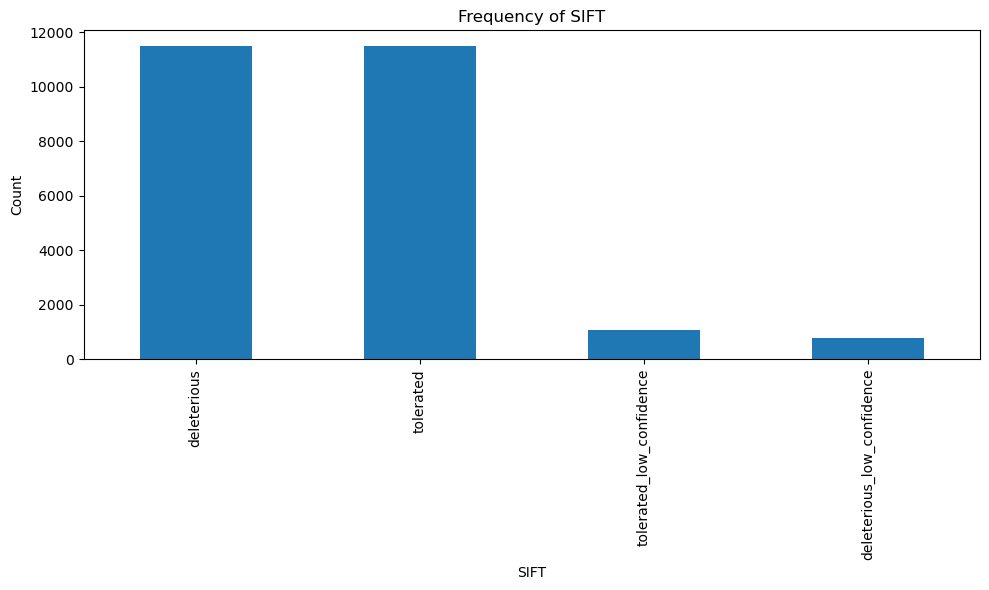

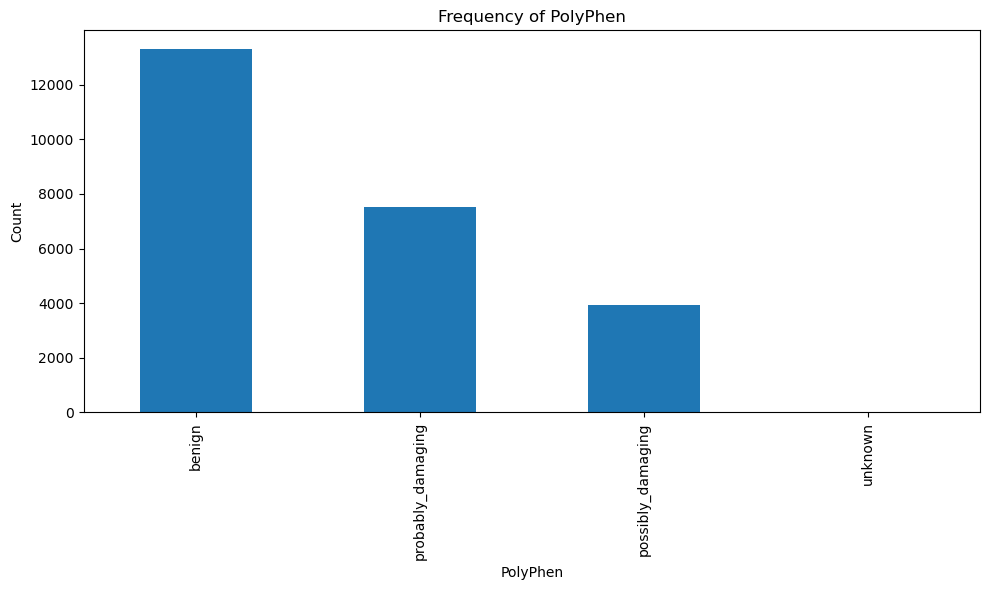

In [448]:
plt.figure(figsize=(10, 6))
leftover_object['SIFT'].value_counts().plot(kind='bar')
plt.xlabel('SIFT')
plt.ylabel('Count')
plt.title('Frequency of SIFT')
plt.tight_layout()
plt.show()

# Generate bar plot for 'PolyPhen'
plt.figure(figsize=(10, 6))
leftover_object['PolyPhen'].value_counts().plot(kind='bar')
plt.xlabel('PolyPhen')
plt.ylabel('Count')
plt.title('Frequency of PolyPhen')
plt.tight_layout()
plt.show()

In [449]:
df_test = df.copy()
df_test = df_test.dropna(subset=['PolyPhen'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24796 entries, 0 to 65184
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             24796 non-null  object 
 1   POS               24796 non-null  int64  
 2   REF               24796 non-null  object 
 3   ALT               24796 non-null  object 
 4   CLNDN             24796 non-null  object 
 5   CLNVC             24796 non-null  object 
 6   ORIGIN            24796 non-null  int64  
 7   CLASS             24796 non-null  int64  
 8   Allele            24796 non-null  object 
 9   Consequence       24796 non-null  object 
 10  IMPACT            24796 non-null  object 
 11  cDNA_position     24796 non-null  object 
 12  CDS_position      24796 non-null  object 
 13  Protein_position  24796 non-null  object 
 14  Amino_acids       24796 non-null  object 
 15  Codons            24796 non-null  object 
 16  STRAND            24796 non-null  float6

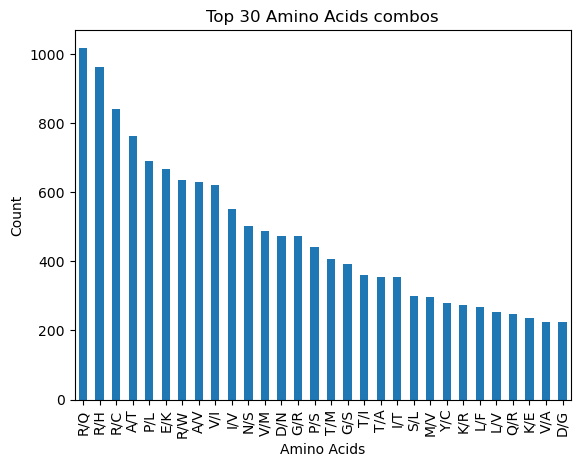

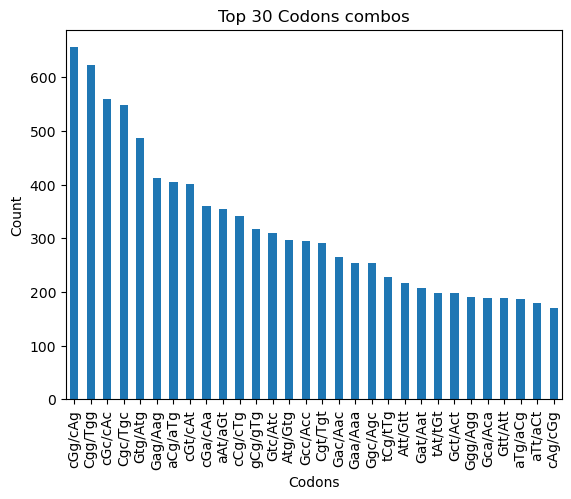

In [450]:
# Filter the dataframe to include only the required columns
subset_df = df_test[['Amino_acids', 'Codons']].copy()

# Get the top N most frequent values in 'Amino_acids' column
top_n_amino_acids = subset_df['Amino_acids'].value_counts().head(30)

# Plot the top N most frequent values in 'Amino_acids' column
top_n_amino_acids.plot(kind='bar')
plt.title('Top 30 Amino Acids combos')
plt.xlabel('Amino Acids')
plt.ylabel('Count')
plt.show()

# Get the top N most frequent values in 'Codons' column
top_n_codons = subset_df['Codons'].value_counts().head(30)

# Plot the top N most frequent values in 'Codons' column
top_n_codons.plot(kind='bar')
plt.title('Top 30 Codons combos')
plt.xlabel('Codons')
plt.ylabel('Count')
plt.show()


In [451]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24796 entries, 0 to 65184
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             24796 non-null  object 
 1   POS               24796 non-null  int64  
 2   REF               24796 non-null  object 
 3   ALT               24796 non-null  object 
 4   CLNDN             24796 non-null  object 
 5   CLNVC             24796 non-null  object 
 6   ORIGIN            24796 non-null  int64  
 7   CLASS             24796 non-null  int64  
 8   Allele            24796 non-null  object 
 9   Consequence       24796 non-null  object 
 10  IMPACT            24796 non-null  object 
 11  cDNA_position     24796 non-null  object 
 12  CDS_position      24796 non-null  object 
 13  Protein_position  24796 non-null  object 
 14  Amino_acids       24796 non-null  object 
 15  Codons            24796 non-null  object 
 16  STRAND            24796 non-null  float6

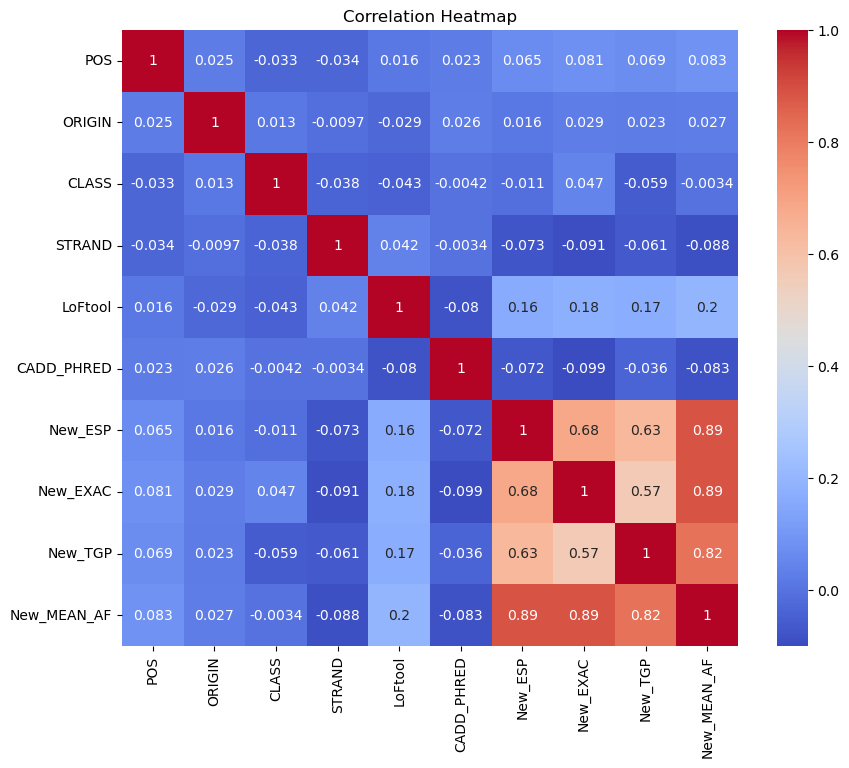

In [452]:
# Create a heatmap
plt.figure(figsize=(10, 8))

correlation_matrix = df_test.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [453]:
# Create a dictionary to store the calculated values
data_clean2 = {
    'Column': [],
    'Unique_Count': [],
    'Data_Type': [],
    'Numeric': [],
    'Continuous': []
}

# Iterate through each column in 'df'
for column in df_test.columns:
    unique_count = df_test[column].nunique()
    data_type = df_test[column].dtype

    # Identify if column is numeric or non-numeric (categorical)
    is_numeric = np.issubdtype(data_type, np.number)
    is_continuous = is_numeric and unique_count > 50

    # Add the calculated values to the dictionary
    data_clean2['Column'].append(column)
    data_clean2['Unique_Count'].append(unique_count)
    data_clean2['Data_Type'].append(data_type)
    data_clean2['Numeric'].append(is_numeric)
    data_clean2['Continuous'].append(is_continuous)

temp_data_clean = pd.DataFrame(data_clean2)

print('CLEANED DATAFRAME:\n')
print(temp_data_clean)

CLEANED DATAFRAME:

              Column  Unique_Count Data_Type  Numeric  Continuous
0              CHROM            22    object    False       False
1                POS         24061     int64     True        True
2                REF             4    object    False       False
3                ALT             4    object    False       False
4              CLNDN          5537    object    False       False
5              CLNVC             3    object    False       False
6             ORIGIN            26     int64     True       False
7              CLASS             2     int64     True       False
8             Allele             4    object    False       False
9        Consequence             4    object    False       False
10            IMPACT             2    object    False       False
11     cDNA_position          7137    object    False       False
12      CDS_position          6224    object    False       False
13  Protein_position          3208    object    False   

In [454]:
# Compute the correlation matrix
correlation_matrix = df_test.corr()

# Initialize a list to store correlation pairs
correlation_pairs = []

# Iterate over the columns and store correlation pairs
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2:
            correlation = correlation_matrix.loc[column1, column2]
            correlation_pairs.append((column1, column2, abs(correlation)))

# Sort the correlation pairs based on absolute correlation values in descending order
correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: x[2], reverse=False)

# Print the sorted correlation pairs
for pair in correlation_pairs_sorted:
    column1, column2, correlation = pair
    print(f"Correlation between {column1} and {column2}: {correlation:.2f}")

Correlation between STRAND and CADD_PHRED: 0.00
Correlation between CADD_PHRED and STRAND: 0.00
Correlation between CLASS and New_MEAN_AF: 0.00
Correlation between New_MEAN_AF and CLASS: 0.00
Correlation between CLASS and CADD_PHRED: 0.00
Correlation between CADD_PHRED and CLASS: 0.00
Correlation between ORIGIN and STRAND: 0.01
Correlation between STRAND and ORIGIN: 0.01
Correlation between CLASS and New_ESP: 0.01
Correlation between New_ESP and CLASS: 0.01
Correlation between ORIGIN and CLASS: 0.01
Correlation between CLASS and ORIGIN: 0.01
Correlation between POS and LoFtool: 0.02
Correlation between LoFtool and POS: 0.02
Correlation between ORIGIN and New_ESP: 0.02
Correlation between New_ESP and ORIGIN: 0.02
Correlation between ORIGIN and New_TGP: 0.02
Correlation between New_TGP and ORIGIN: 0.02
Correlation between POS and CADD_PHRED: 0.02
Correlation between CADD_PHRED and POS: 0.02
Correlation between POS and ORIGIN: 0.02
Correlation between ORIGIN and POS: 0.02
Correlation betw

In [455]:
test_objects = df_test.select_dtypes(include=['object'])

In [456]:
from sklearn.preprocessing import LabelEncoder

# Create a new dataframe to store the label encoded values
test_encoded = test_objects.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
for column in test_encoded.columns:
    # Check if the column's dtype is 'object'
    if test_encoded[column].dtype == 'object':
        # Apply label encoding to the column
        test_encoded[column] = label_encoder.fit_transform(test_encoded[column])

# Check the encoded dataframe
print(test_encoded.head())


    CHROM  REF  ALT  CLNDN  CLNVC  Allele  Consequence  IMPACT  cDNA_position  \
0       0    2    1   5320      2       1            0       1            522   
1       0    2    0   5025      2       0            0       1            493   
2       0    0    2   5063      2       2            0       1            602   
9       0    2    0   3908      2       0            0       1           3764   
10      0    2    0   3908      2       0            0       1           3684   

    CDS_position  Protein_position  Amino_acids  Codons  SIFT  PolyPhen  
0            497               173           27     396     2         0  
1            485               169          102     298     1         0  
2            229                79           65     242     0         2  
9           3153              1224          143     217     0         0  
10          3080              1191          124      78     0         2  


In [457]:
# Convert encoded columns to numeric type
test_encoded = test_encoded.astype('int64')

# Reassign the converted columns to clean_objects
test_objects[['CHROM', 'REF', 'ALT', 'CLNDN', 'CLNVC', 'Allele', 'Consequence',
               'IMPACT', 'cDNA_position', 'CDS_position', 'Protein_position',
               'Amino_acids', 'Codons', 'SIFT', 'PolyPhen']] = test_encoded

# Check the updated dataframe
test_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24796 entries, 0 to 65184
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHROM             24796 non-null  int64
 1   REF               24796 non-null  int64
 2   ALT               24796 non-null  int64
 3   CLNDN             24796 non-null  int64
 4   CLNVC             24796 non-null  int64
 5   Allele            24796 non-null  int64
 6   Consequence       24796 non-null  int64
 7   IMPACT            24796 non-null  int64
 8   cDNA_position     24796 non-null  int64
 9   CDS_position      24796 non-null  int64
 10  Protein_position  24796 non-null  int64
 11  Amino_acids       24796 non-null  int64
 12  Codons            24796 non-null  int64
 13  SIFT              24796 non-null  int64
 14  PolyPhen          24796 non-null  int64
dtypes: int64(15)
memory usage: 3.0 MB


In [458]:
# Reassign the converted columns to clean_objects
df_test[['CHROM', 'REF', 'ALT', 'CLNDN', 'CLNVC', 'Allele', 'Consequence',
               'IMPACT', 'cDNA_position', 'CDS_position', 'Protein_position',
               'Amino_acids', 'Codons', 'SIFT', 'PolyPhen']] = test_objects

# Check the updated dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24796 entries, 0 to 65184
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             24796 non-null  int64  
 1   POS               24796 non-null  int64  
 2   REF               24796 non-null  int64  
 3   ALT               24796 non-null  int64  
 4   CLNDN             24796 non-null  int64  
 5   CLNVC             24796 non-null  int64  
 6   ORIGIN            24796 non-null  int64  
 7   CLASS             24796 non-null  int64  
 8   Allele            24796 non-null  int64  
 9   Consequence       24796 non-null  int64  
 10  IMPACT            24796 non-null  int64  
 11  cDNA_position     24796 non-null  int64  
 12  CDS_position      24796 non-null  int64  
 13  Protein_position  24796 non-null  int64  
 14  Amino_acids       24796 non-null  int64  
 15  Codons            24796 non-null  int64  
 16  STRAND            24796 non-null  float6

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_test2 = df_test.copy()

# Step 1: Split dataset into predictors (X) and target variable (y)
X = df_test2.drop('PolyPhen', axis=1)
y = df_test2['PolyPhen']

# Step 2: Encode categorical variables if needed

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create logistic regression model
logreg = LogisticRegression()

# Step 5: Fit the model to the training data
logreg.fit(X_train, y_train)

# Step 6: Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5383064516129032


In [460]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

df_test3 = df_test.copy()

X = df_test3.drop('PolyPhen', axis=1)
y = df_test3['PolyPhen']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.001)  # Adjust the alpha parameter as needed
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Identify selected features with non-zero coefficients
selected_features = X.columns[coefficients != 0]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['CHROM', 'POS', 'REF', 'CLNDN', 'CLNVC', 'ORIGIN', 'CLASS', 'IMPACT',
       'Protein_position', 'Amino_acids', 'Codons', 'STRAND', 'SIFT',
       'LoFtool', 'CADD_PHRED', 'New_ESP', 'New_EXAC', 'New_TGP'],
      dtype='object')


In [461]:
# Use selected features for logistic regression
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_selected, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test_selected)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5383064516129032


In [462]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Create and fit the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7518145161290323


# Second Test

In [463]:
import numpy as np

# Convert unknown values in 'PolyPhen' to NaN
leftover_object['PolyPhen'].replace('unknown', np.nan, inplace=True)

leftover_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   REF          65188 non-null  object
 1   Amino_acids  55184 non-null  object
 2   Codons       55184 non-null  object
 3   SIFT         24836 non-null  object
 4   PolyPhen     24792 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


C:\Users\Jody\AppData\Local\Temp\ipykernel_35192\3313659037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftover_object['PolyPhen'].replace('unknown', np.nan, inplace=True)


In [464]:
# Print unique counts of DataFrame columns
unique_counts = leftover_object.nunique()
print(unique_counts)

REF               4
Amino_acids    1262
Codons         2220
SIFT              4
PolyPhen          3
dtype: int64


In [465]:
# Drop 'Amino_acids' and 'Codons' columns
leftover_object.drop(['Amino_acids', 'Codons'], axis=1, inplace=True)

print(leftover_object.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   REF       65188 non-null  object
 1   SIFT      24836 non-null  object
 2   PolyPhen  24792 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB
None


C:\Users\Jody\AppData\Local\Temp\ipykernel_35192\2905298076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftover_object.drop(['Amino_acids', 'Codons'], axis=1, inplace=True)


In [466]:
leftover_object.drop('REF', axis=1, inplace=True)

# Print information about the updated DataFrame
print(leftover_object.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SIFT      24836 non-null  object
 1   PolyPhen  24792 non-null  object
dtypes: object(2)
memory usage: 1018.7+ KB
None


C:\Users\Jody\AppData\Local\Temp\ipykernel_35192\1028470517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftover_object.drop('REF', axis=1, inplace=True)


For the previous columns, I was able to impute null values in different ways. However, SIFT and PolyPhen have a significant amount of missing values, more than 50% in fact. For the time being, I'm going to change the null values to 'Unknown' because there may be significance behind these values being unknown instead of just null. Since I'm skeptical, I'd rather not change much yet. In the future, the rows may have to be dropped entirely. Let's come back to that later.

In [467]:
leftover_object.fillna('Unknown', inplace=True)

C:\Users\Jody\AppData\Local\Temp\ipykernel_35192\4265957600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leftover_object.fillna('Unknown', inplace=True)


In [468]:
leftover_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SIFT      65188 non-null  object
 1   PolyPhen  65188 non-null  object
dtypes: object(2)
memory usage: 1018.7+ KB


In [469]:
df[['SIFT', 'PolyPhen']] = leftover_object[['SIFT', 'PolyPhen']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDN             65188 non-null  object 
 5   CLNVC             65188 non-null  object 
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  object 
 9   Consequence       65188 non-null  object 
 10  IMPACT            65188 non-null  object 
 11  cDNA_position     65188 non-null  object 
 12  CDS_position      65188 non-null  object 
 13  Protein_position  65188 non-null  object 
 14  Amino_acids       55184 non-null  object 
 15  Codons            55184 non-null  object 
 16  STRAND            65188 non-null  float6

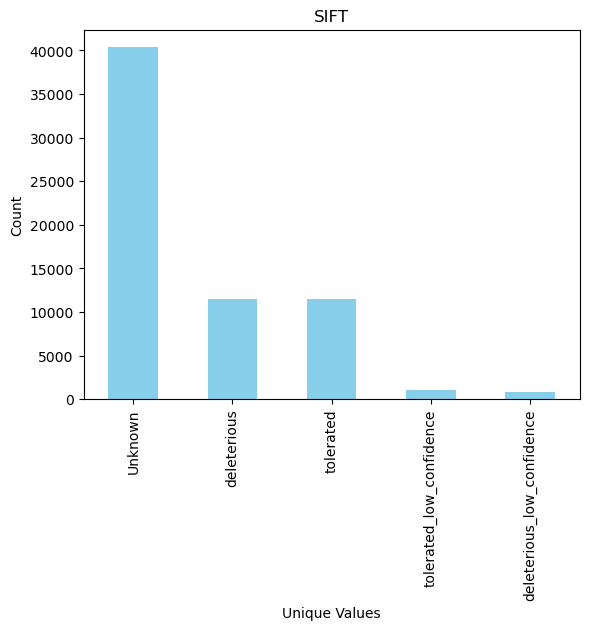

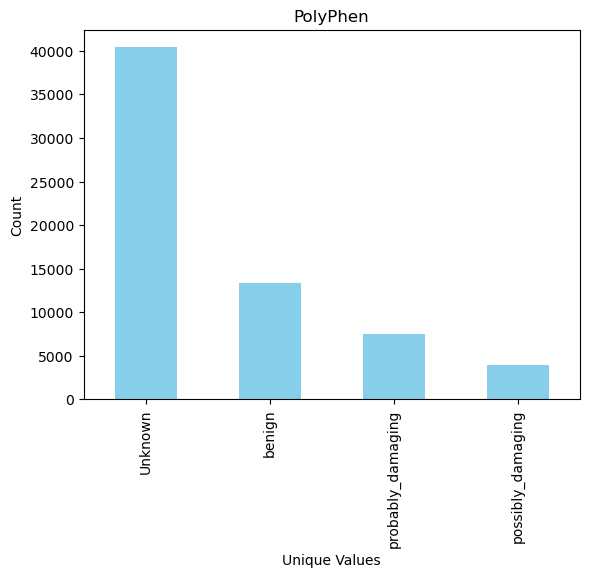

In [470]:
# Specify the columns for which you want to plot the bar plots
columns_to_plot = ['SIFT', 'PolyPhen']

# Plot bar plots for each column
for column in columns_to_plot:
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(column)
    plt.xlabel('Unique Values')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [471]:
sift_counts = df['Amino_acids'].nunique()
polyphen_counts = df['Codons'].nunique()

print("Unique counts of Amino_acids column:")
print(sift_counts)

print("\nUnique counts of Codons column:")
print(polyphen_counts)

Unique counts of Amino_acids column:
1262

Unique counts of Codons column:
2220


The last two columns to clean are the 'Amino_acids' and 'Codons' column. They both have a significant amount of unique values. Let's visualize some of the top values and their uniqueness.

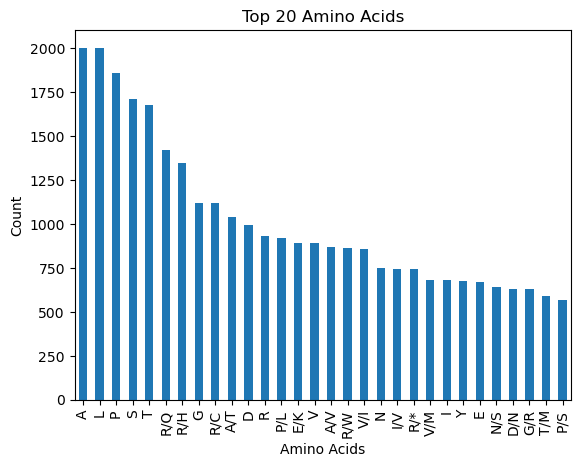

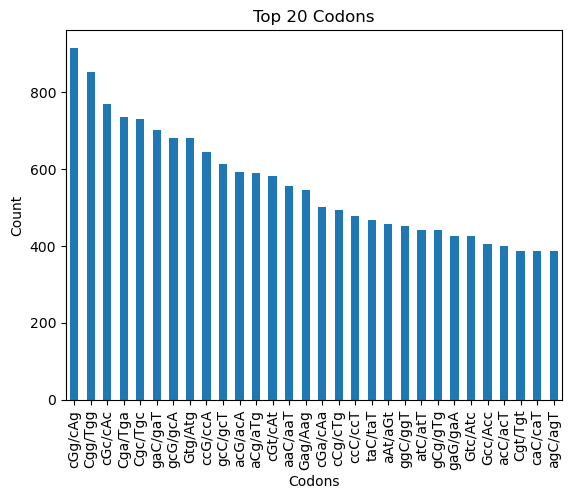

In [472]:
# Filter the dataframe to include only the required columns
subset_df = df[['Amino_acids', 'Codons']].copy()

# Get the top N most frequent values in 'Amino_acids' column
top_n_amino_acids = subset_df['Amino_acids'].value_counts().head(30)

# Plot the top N most frequent values in 'Amino_acids' column
top_n_amino_acids.plot(kind='bar')
plt.title('Top 20 Amino Acids')
plt.xlabel('Amino Acids')
plt.ylabel('Count')
plt.show()

# Get the top N most frequent values in 'Codons' column
top_n_codons = subset_df['Codons'].value_counts().head(30)

# Plot the top N most frequent values in 'Codons' column
top_n_codons.plot(kind='bar')
plt.title('Top 20 Codons')
plt.xlabel('Codons')
plt.ylabel('Count')
plt.show()


In [473]:
df['Amino_acids'].fillna('Unknown', inplace=True)
df['Codons'].fillna('Unknown', inplace=True)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDN             65188 non-null  object 
 5   CLNVC             65188 non-null  object 
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  object 
 9   Consequence       65188 non-null  object 
 10  IMPACT            65188 non-null  object 
 11  cDNA_position     65188 non-null  object 
 12  CDS_position      65188 non-null  object 
 13  Protein_position  65188 non-null  object 
 14  Amino_acids       65188 non-null  object 
 15  Codons            65188 non-null  object 
 16  STRAND            65188 non-null  float6

In [475]:
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDN             65188 non-null  object 
 5   CLNVC             65188 non-null  object 
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  object 
 9   Consequence       65188 non-null  object 
 10  IMPACT            65188 non-null  object 
 11  cDNA_position     65188 non-null  object 
 12  CDS_position      65188 non-null  object 
 13  Protein_position  65188 non-null  object 
 14  Amino_acids       65188 non-null  object 
 15  Codons            65188 non-null  object 
 16  STRAND            65188 non-null  float6

# Data Cleaning Complete

In [476]:
# Create a dictionary to store the calculated values
data_clean = {
    'Column': [],
    'Unique_Count': [],
    'Data_Type': [],
    'Numeric': [],
    'Continuous': []
}

# Iterate through each column in 'df'
for column in df_clean.columns:
    unique_count = df_clean[column].nunique()
    data_type = df_clean[column].dtype

    # Identify if column is numeric or non-numeric (categorical)
    is_numeric = np.issubdtype(data_type, np.number)
    is_continuous = is_numeric and unique_count > 50

    # Add the calculated values to the dictionary
    data_clean['Column'].append(column)
    data_clean['Unique_Count'].append(unique_count)
    data_clean['Data_Type'].append(data_type)
    data_clean['Numeric'].append(is_numeric)
    data_clean['Continuous'].append(is_continuous)

temp_data_clean = pd.DataFrame(data_clean)

print('CLEANED DATAFRAME:\n')
print(temp_data_clean)

CLEANED DATAFRAME:

              Column  Unique_Count Data_Type  Numeric  Continuous
0              CHROM            22    object    False       False
1                POS         63115     int64     True        True
2                REF             4    object    False       False
3                ALT             4    object    False       False
4              CLNDN          9260    object    False       False
5              CLNVC             7    object    False       False
6             ORIGIN            31     int64     True       False
7              CLASS             2     int64     True       False
8             Allele             4    object    False       False
9        Consequence            48    object    False       False
10            IMPACT             4    object    False       False
11     cDNA_position         11889    object    False       False
12      CDS_position         11660    object    False       False
13  Protein_position          6332    object    False   

In [477]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   CLNDN             65188 non-null  object 
 5   CLNVC             65188 non-null  object 
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  object 
 9   Consequence       65188 non-null  object 
 10  IMPACT            65188 non-null  object 
 11  cDNA_position     65188 non-null  object 
 12  CDS_position      65188 non-null  object 
 13  Protein_position  65188 non-null  object 
 14  Amino_acids       65188 non-null  object 
 15  Codons            65188 non-null  object 
 16  STRAND            65188 non-null  float6

The blocks of code above display two different dataframes - the main 'df_clean' dataframe and the 'temp_data_clean' dataframe, which is simply a sub-dataframe engineered from 'df_clean' with specific calculations and cleaned columns.

Let's move on to feature engineering to prepare for our model generation.

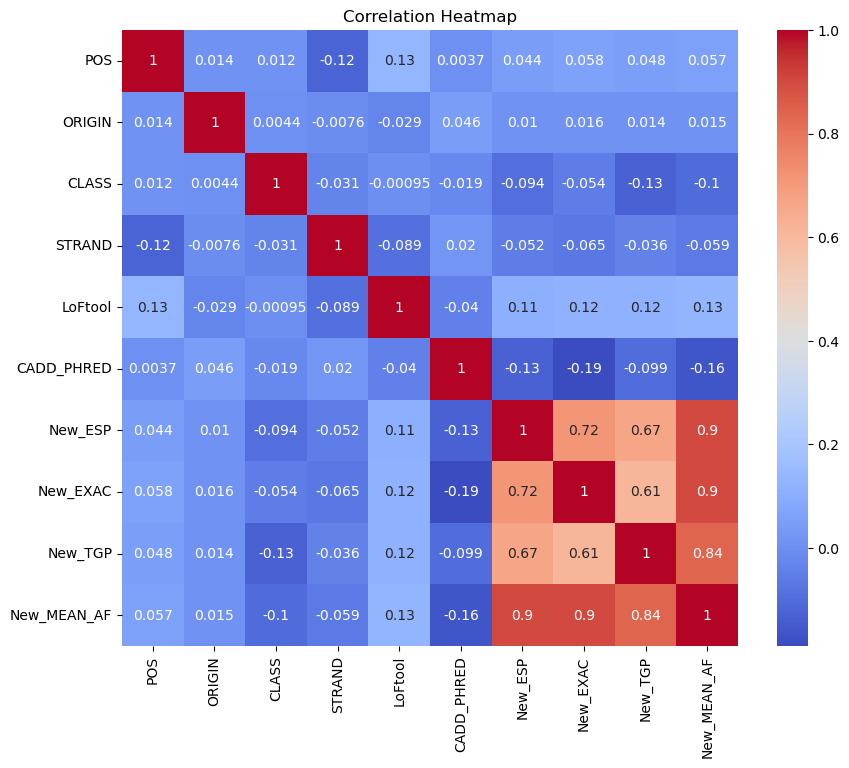

In [478]:
# Create a heatmap
plt.figure(figsize=(10, 8))

correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [479]:
# Compute the correlation matrix
correlation_matrix = df_clean.corr()

# Initialize a list to store correlation pairs
correlation_pairs = []

# Iterate over the columns and store correlation pairs
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2:
            correlation = correlation_matrix.loc[column1, column2]
            correlation_pairs.append((column1, column2, abs(correlation)))

# Sort the correlation pairs based on absolute correlation values in descending order
correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: x[2], reverse=False)

# Print the sorted correlation pairs
for pair in correlation_pairs_sorted:
    column1, column2, correlation = pair
    print(f"Correlation between {column1} and {column2}: {correlation:.2f}")

Correlation between CLASS and LoFtool: 0.00
Correlation between LoFtool and CLASS: 0.00
Correlation between POS and CADD_PHRED: 0.00
Correlation between CADD_PHRED and POS: 0.00
Correlation between ORIGIN and CLASS: 0.00
Correlation between CLASS and ORIGIN: 0.00
Correlation between ORIGIN and STRAND: 0.01
Correlation between STRAND and ORIGIN: 0.01
Correlation between ORIGIN and New_ESP: 0.01
Correlation between New_ESP and ORIGIN: 0.01
Correlation between POS and CLASS: 0.01
Correlation between CLASS and POS: 0.01
Correlation between POS and ORIGIN: 0.01
Correlation between ORIGIN and POS: 0.01
Correlation between ORIGIN and New_TGP: 0.01
Correlation between New_TGP and ORIGIN: 0.01
Correlation between ORIGIN and New_MEAN_AF: 0.02
Correlation between New_MEAN_AF and ORIGIN: 0.02
Correlation between ORIGIN and New_EXAC: 0.02
Correlation between New_EXAC and ORIGIN: 0.02
Correlation between CLASS and CADD_PHRED: 0.02
Correlation between CADD_PHRED and CLASS: 0.02
Correlation between ST

Based on the heat map and correlation analysis, certain variables are more favorable to be targets. Some variables like the allele frequency columns have high correlations with other variables and themselves. Thus, they are less suited to be targets and will be better served as predictors. 

There's one thing to keep in mind though - the correlations are only being calculated for the numerical values in the cleaned dataframe (df_clean). Thus, we must transform the 'object' columns to numeric to evaluate ALL variables of the dataframe.

In [480]:
clean_objects = df_clean.select_dtypes(include=['object'])
clean_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CHROM             65188 non-null  object
 1   REF               65188 non-null  object
 2   ALT               65188 non-null  object
 3   CLNDN             65188 non-null  object
 4   CLNVC             65188 non-null  object
 5   Allele            65188 non-null  object
 6   Consequence       65188 non-null  object
 7   IMPACT            65188 non-null  object
 8   cDNA_position     65188 non-null  object
 9   CDS_position      65188 non-null  object
 10  Protein_position  65188 non-null  object
 11  Amino_acids       65188 non-null  object
 12  Codons            65188 non-null  object
 13  SIFT              65188 non-null  object
 14  PolyPhen          65188 non-null  object
dtypes: object(15)
memory usage: 7.5+ MB


In [481]:
from sklearn.preprocessing import LabelEncoder

# Create a new dataframe to store the label encoded values
encoded_df = clean_objects.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
for column in encoded_df.columns:
    # Check if the column's dtype is 'object'
    if encoded_df[column].dtype == 'object':
        # Apply label encoding to the column
        encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Check the encoded dataframe
print(encoded_df.head())


   CHROM  REF  ALT  CLNDN  CLNVC  Allele  Consequence  IMPACT  cDNA_position  \
0      0    2    1   8960      6       1           17       2            547   
1      0    2    0   8388      6       0           17       2            518   
2      0    0    2   8449      6       2           17       2            627   
3      0    2    0   8156      6       0           17       2            127   
4      0    2    3   8154      6       3           17       2            127   

   CDS_position  Protein_position  Amino_acids  Codons  SIFT  PolyPhen  
0           521               173          257    1654     3         1  
1           508               169          756    1144     2         1  
2           238                79          480     814     1         3  
3            99                33          377     523     0         0  
4            99                33          362     525     0         0  


In [482]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHROM             65188 non-null  int32
 1   REF               65188 non-null  int32
 2   ALT               65188 non-null  int32
 3   CLNDN             65188 non-null  int32
 4   CLNVC             65188 non-null  int32
 5   Allele            65188 non-null  int32
 6   Consequence       65188 non-null  int32
 7   IMPACT            65188 non-null  int32
 8   cDNA_position     65188 non-null  int32
 9   CDS_position      65188 non-null  int32
 10  Protein_position  65188 non-null  int32
 11  Amino_acids       65188 non-null  int32
 12  Codons            65188 non-null  int32
 13  SIFT              65188 non-null  int32
 14  PolyPhen          65188 non-null  int32
dtypes: int32(15)
memory usage: 3.7 MB


In [483]:
# Convert encoded columns to numeric type
encoded_df = encoded_df.astype('int64')

# Reassign the converted columns to clean_objects
clean_objects[['CHROM', 'REF', 'ALT', 'CLNDN', 'CLNVC', 'Allele', 'Consequence',
               'IMPACT', 'cDNA_position', 'CDS_position', 'Protein_position',
               'Amino_acids', 'Codons', 'SIFT', 'PolyPhen']] = encoded_df

# Check the updated dataframe
clean_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHROM             65188 non-null  int64
 1   REF               65188 non-null  int64
 2   ALT               65188 non-null  int64
 3   CLNDN             65188 non-null  int64
 4   CLNVC             65188 non-null  int64
 5   Allele            65188 non-null  int64
 6   Consequence       65188 non-null  int64
 7   IMPACT            65188 non-null  int64
 8   cDNA_position     65188 non-null  int64
 9   CDS_position      65188 non-null  int64
 10  Protein_position  65188 non-null  int64
 11  Amino_acids       65188 non-null  int64
 12  Codons            65188 non-null  int64
 13  SIFT              65188 non-null  int64
 14  PolyPhen          65188 non-null  int64
dtypes: int64(15)
memory usage: 7.5 MB


The columns have successfully been converted to numeric. Now, we can replace the respective df_clean values with newly transformed object columns (now int64). 

In [484]:
# Reassign the converted columns to clean_objects
df_clean[['CHROM', 'REF', 'ALT', 'CLNDN', 'CLNVC', 'Allele', 'Consequence',
               'IMPACT', 'cDNA_position', 'CDS_position', 'Protein_position',
               'Amino_acids', 'Codons', 'SIFT', 'PolyPhen']] = clean_objects

# Check the updated dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  int64  
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   CLNDN             65188 non-null  int64  
 5   CLNVC             65188 non-null  int64  
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  int64  
 9   Consequence       65188 non-null  int64  
 10  IMPACT            65188 non-null  int64  
 11  cDNA_position     65188 non-null  int64  
 12  CDS_position      65188 non-null  int64  
 13  Protein_position  65188 non-null  int64  
 14  Amino_acids       65188 non-null  int64  
 15  Codons            65188 non-null  int64  
 16  STRAND            65188 non-null  float6

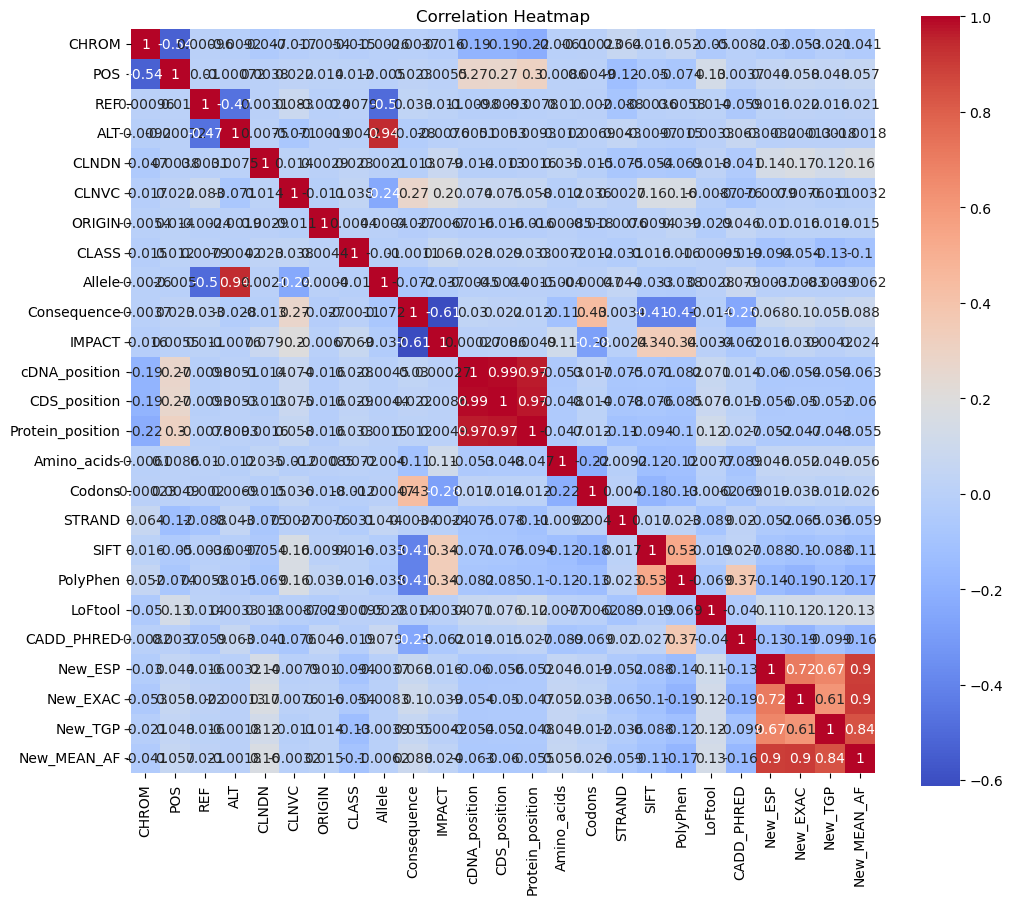

In [485]:
# Create a heatmap
plt.figure(figsize=(12, 10))

correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

There's a lot going on in the correlation heat map above. However, there appear to be some heavy correlations between some variables. Let's print out all of the correlation pairs.

In [486]:
# Initialize a list to store correlation pairs
correlation_pairs = []

# Iterate over the columns and store correlation pairs
columns = correlation_matrix.columns
num_columns = len(columns)

for i in range(num_columns):
    for j in range(i + 1, num_columns):
        column1 = columns[i]
        column2 = columns[j]
        correlation = correlation_matrix.loc[column1, column2]
        correlation_pairs.append((column1, column2, abs(correlation)))

# Sort the correlation pairs based on absolute correlation values in descending order
correlation_pairs_sorted = sorted(correlation_pairs, key=lambda x: x[2], reverse=True)

# Print the sorted correlation pairs
for pair in correlation_pairs_sorted:
    column1, column2, correlation = pair
    print(f"Correlation between {column1} and {column2}: {correlation:.2f}")


Correlation between cDNA_position and CDS_position: 0.99
Correlation between CDS_position and Protein_position: 0.97
Correlation between cDNA_position and Protein_position: 0.97
Correlation between ALT and Allele: 0.94
Correlation between New_EXAC and New_MEAN_AF: 0.90
Correlation between New_ESP and New_MEAN_AF: 0.90
Correlation between New_TGP and New_MEAN_AF: 0.84
Correlation between New_ESP and New_EXAC: 0.72
Correlation between New_ESP and New_TGP: 0.67
Correlation between Consequence and IMPACT: 0.61
Correlation between New_EXAC and New_TGP: 0.61
Correlation between CHROM and POS: 0.54
Correlation between SIFT and PolyPhen: 0.53
Correlation between REF and Allele: 0.50
Correlation between REF and ALT: 0.47
Correlation between Consequence and Codons: 0.43
Correlation between Consequence and SIFT: 0.41
Correlation between Consequence and PolyPhen: 0.41
Correlation between PolyPhen and CADD_PHRED: 0.37
Correlation between IMPACT and SIFT: 0.34
Correlation between IMPACT and PolyPhen

In [487]:
for column in df_clean.columns:
    print(f'{column}: ', df_clean[column].nunique())

CHROM:  22
POS:  63115
REF:  4
ALT:  4
CLNDN:  9260
CLNVC:  7
ORIGIN:  31
CLASS:  2
Allele:  4
Consequence:  48
IMPACT:  4
cDNA_position:  11889
CDS_position:  11660
Protein_position:  6332
Amino_acids:  1263
Codons:  2221
STRAND:  3
SIFT:  5
PolyPhen:  4
LoFtool:  1196
CADD_PHRED:  9325
New_ESP:  9481
New_EXAC:  10578
New_TGP:  10616
New_MEAN_AF:  45309


In [488]:
correlations = df_clean.corr()['PolyPhen']
print(correlations)

CHROM               0.052004
POS                -0.074497
REF                 0.005775
ALT                -0.014765
CLNDN              -0.069210
CLNVC               0.159721
ORIGIN              0.038505
CLASS               0.016239
Allele             -0.038430
Consequence        -0.407383
IMPACT              0.341901
cDNA_position      -0.081675
CDS_position       -0.084635
Protein_position   -0.101555
Amino_acids        -0.120060
Codons             -0.133547
STRAND              0.022501
SIFT                0.530268
PolyPhen            1.000000
LoFtool            -0.068999
CADD_PHRED          0.366697
New_ESP            -0.141355
New_EXAC           -0.190233
New_TGP            -0.116582
New_MEAN_AF        -0.173322
Name: PolyPhen, dtype: float64


In [489]:
corr_abs = df_clean.corr()['PolyPhen'].abs()
corr_abs = corr_abs.sort_values(ascending=False)
print(corr_abs)

PolyPhen            1.000000
SIFT                0.530268
Consequence         0.407383
CADD_PHRED          0.366697
IMPACT              0.341901
New_EXAC            0.190233
New_MEAN_AF         0.173322
CLNVC               0.159721
New_ESP             0.141355
Codons              0.133547
Amino_acids         0.120060
New_TGP             0.116582
Protein_position    0.101555
CDS_position        0.084635
cDNA_position       0.081675
POS                 0.074497
CLNDN               0.069210
LoFtool             0.068999
CHROM               0.052004
ORIGIN              0.038505
Allele              0.038430
STRAND              0.022501
CLASS               0.016239
ALT                 0.014765
REF                 0.005775
Name: PolyPhen, dtype: float64


As seen in the code above, the 'PolyPhen' variables was chosen as the target variable. To recall, the 'PolyPhen' feature is a computational tool used in genetics to predict the potential impact of amino acid substitutions on protein structure and function, aiding in the assessment of genetic variant pathogenicity.

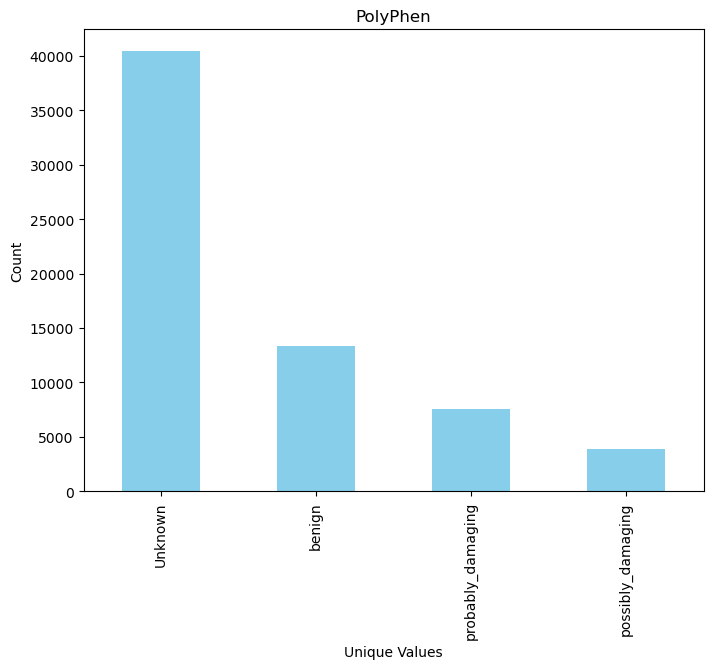

In [490]:
# Specify the columns for which you want to plot the bar plots
columns_to_plot = ['PolyPhen']

# Create subplots for each column
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bar plot
df[columns_to_plot[0]].value_counts().plot(kind='bar', ax=ax, color='skyblue')

# Set title, x-label, and y-label
ax.set_title(columns_to_plot[0])
ax.set_xlabel('Unique Values')
ax.set_ylabel('Count')

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

In [491]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_clean2 = df_clean.copy()

# Step 1: Split dataset into predictors (X) and target variable (y)
X = df_clean2.drop('PolyPhen', axis=1)
y = df_clean2['PolyPhen']

# Step 2: Encode categorical variables if needed

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create logistic regression model
logreg = LogisticRegression()

# Step 5: Fit the model to the training data
logreg.fit(X_train, y_train)

# Step 6: Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6242521859180856


In [492]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

df_clean3 = df_clean.copy()

X = df_clean3.drop('PolyPhen', axis=1)
y = df_clean3['PolyPhen']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust the alpha parameter as needed
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Identify selected features with non-zero coefficients
selected_features = X.columns[coefficients != 0]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['CLNVC', 'Consequence', 'IMPACT', 'SIFT', 'CADD_PHRED', 'New_EXAC'], dtype='object')


In [493]:
# Use selected features for logistic regression
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test_selected)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8867924528301887


C:\Users\Jody\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [494]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Create and fit the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8755177174413253


In [495]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Create and fit the Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7709771437337015


In [496]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features with interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Create and fit the logistic regression model with polynomial features
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_poly, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test_poly)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8917778800429513


C:\Users\Jody\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [497]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.6242521859180856

In [498]:
from sklearn.metrics import confusion_matrix

# Obtain the predictions from the logistic regression model with polynomial features
y_pred_poly = logreg.predict(X_test_poly)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred_poly, labels=[1, 0])
print(confusion)


[[2269   17]
 [  29 8097]]


In [499]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

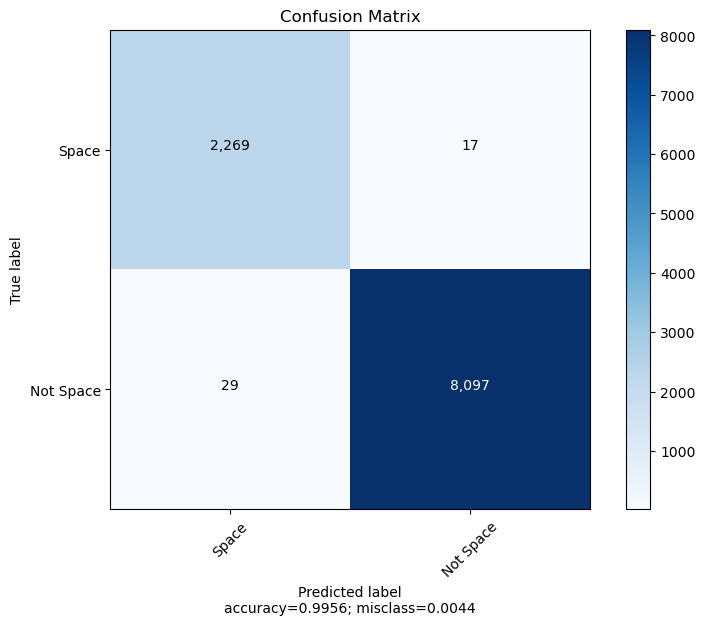

In [500]:
plot_confusion_matrix(cm=confusion, target_names = ['Space', 'Not Space'], title = 'Confusion Matrix',normalize=False)

In [501]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.89
Precision score: 0.85
Recall score: 0.89
F1 score: 0.87


In [502]:
probs = logreg.predict_proba(X_test_poly)[:, 1]
print(probs[1:30])

[3.74869394e-01 9.98265770e-01 6.56943454e-04 1.72285081e-01
 6.46920825e-03 2.93597893e-07 1.45606221e-04 2.49080690e-04
 7.24859970e-01 1.05657539e-07 3.97640723e-05 1.84100988e-03
 2.14041918e-03 2.43212425e-01 1.90448076e-01 8.24420660e-01
 7.94350298e-01 1.40348417e-03 1.67598324e-07 1.20497831e-03
 6.49747632e-01 1.59573682e-07 9.94941106e-01 4.42364943e-04
 9.95828979e-06 1.39367714e-03 3.19729811e-06 7.99370987e-01
 7.10859910e-01]


C:\Users\Jody\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Jody\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


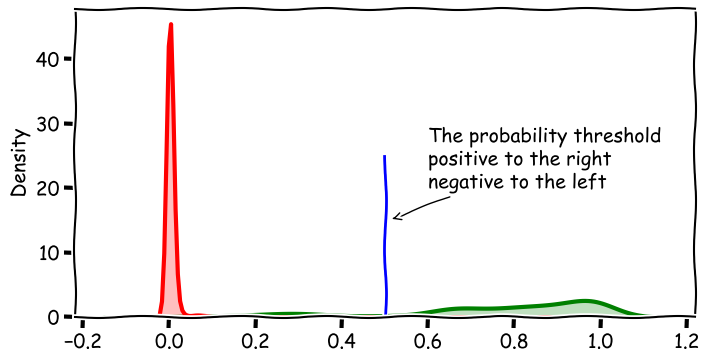

In [503]:
pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

In [504]:
# Calculate the predicted probabilities with proper normalization
probs = logreg.predict_proba(X_test_poly)
probs_normalized = probs / probs.sum(axis=1, keepdims=True)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, probs_normalized, multi_class='ovr')

print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.9578555652125563


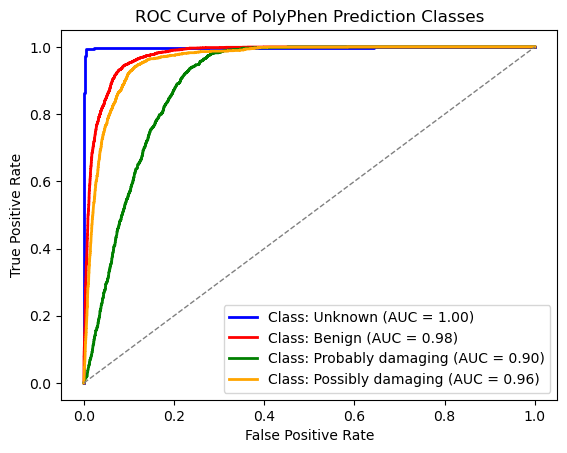

In [505]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the predicted probabilities for each class
probs = logreg.predict_proba(X_test_poly)

# Define the label names for each class
class_labels = ['Unknown', 'Benign', 'Probably damaging', 'Possibly damaging']  # Adjust as needed

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class with updated label names
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  # Adjust the colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class: {0} (AUC = {1:.2f})'.format(class_labels[i], roc_auc[i]))

# Plot the random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of PolyPhen Prediction Classes')
plt.legend(loc='lower right')
plt.show()


In [506]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  int64  
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  int64  
 3   ALT               65188 non-null  int64  
 4   CLNDN             65188 non-null  int64  
 5   CLNVC             65188 non-null  int64  
 6   ORIGIN            65188 non-null  int64  
 7   CLASS             65188 non-null  int64  
 8   Allele            65188 non-null  int64  
 9   Consequence       65188 non-null  int64  
 10  IMPACT            65188 non-null  int64  
 11  cDNA_position     65188 non-null  int64  
 12  CDS_position      65188 non-null  int64  
 13  Protein_position  65188 non-null  int64  
 14  Amino_acids       65188 non-null  int64  
 15  Codons            65188 non-null  int64  
 16  STRAND            65188 non-null  float6

My next goal is to analyze a continuous target variable as opposed to a categorical one. 

In [507]:
df_clean.nunique()

CHROM                  22
POS                 63115
REF                     4
ALT                     4
CLNDN                9260
CLNVC                   7
ORIGIN                 31
CLASS                   2
Allele                  4
Consequence            48
IMPACT                  4
cDNA_position       11889
CDS_position        11660
Protein_position     6332
Amino_acids          1263
Codons               2221
STRAND                  3
SIFT                    5
PolyPhen                4
LoFtool              1196
CADD_PHRED           9325
New_ESP              9481
New_EXAC            10578
New_TGP             10616
New_MEAN_AF         45309
dtype: int64

In [508]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_clean3 = df_clean.copy()

# Step 1: Split dataset into predictors (X) and target variable (y)
X = df_clean3.drop('CLASS', axis=1)
y = df_clean3['CLASS']

# Step 2: Encode categorical variables if needed

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create logistic regression model
logreg = LogisticRegression()

# Step 5: Fit the model to the training data
logreg.fit(X_train, y_train)

# Step 6: Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Step 7: Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7491946617579384


In [509]:
# Step 1: Split dataset into predictors (X) and target variable (y)
X = df_clean3.drop('CLASS', axis=1)
y = df_clean3['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=0.01)  # Adjust the alpha parameter as needed
lasso.fit(X_train_scaled, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Identify selected features with non-zero coefficients
selected_features = X.columns[coefficients != 0]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['CLNDN', 'CLNVC', 'Consequence', 'IMPACT', 'Protein_position', 'STRAND',
       'New_ESP', 'New_TGP'],
      dtype='object')


In [510]:
# Use selected features for logistic regression
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test_selected)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.740987881576929


In [511]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Create and fit the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7522626169657923


In [512]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Add interaction terms using PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_interactions = poly.fit_transform(X_train)
X_test_interactions = poly.transform(X_test)

# Create and fit the logistic regression model with interaction terms
logreg = LogisticRegression()
logreg.fit(X_train_interactions, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_interactions)

# Calculate the accuracy of logistic regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Create and fit the Random Forest classifier with interaction terms
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_interactions, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_interactions)

# Calculate the accuracy of Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


C:\Users\Jody\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7423684614204633
Random Forest Accuracy: 0.7502684460806872
